## Steady State

In [2]:
import liana as li
import scanpy as sc

In [13]:
import omnipath as op

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# import all individual methods
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

In [26]:
adata = sc.read("preprocessed_data/batch_corrected_df.h5ad")

In [ ]:
# Combine cell types in 1 column
adata.obs['Annotation_str'] = adata.obs['Annotation'].astype(str)
adata.obs['cell_type_str'] = adata.obs['cell_type'].astype(str)

# Now combine using fillna
adata.obs['Cell_type'] = adata.obs['Annotation_str'].replace('nan', pd.NA).fillna(
    adata.obs['cell_type_str'].replace('nan', pd.NA)
)
adata.obs = adata.obs.drop(columns=["Annotation_str", "cell_type_str"])
# Check
adata.obs

Annotation Mouse_ID Unique_ID  \
M1_S3.GACCAATGTTCTCTAT-gc_neur                  Neuron_1       M1        S3   
M1_S4.CTGATCCCACAAGCAG-gc_neur                  Neuron_1       M1        S4   
M1_S3.ACGTCCTAGGATTTAG-gc_neur                  Neuron_1       M1        S3   
M1_S4.AGGTTGTAGCACGATG-gc_neur                  Neuron_2       M1        S4   
M1_S3.TCATGTTCATCCGTGG-gc_neur                  Neuron_1       M1        S3   
...                                                  ...      ...       ...   
TTTCAGTGGTATGC_Jejunum_m2_Stem-adata_ep              NaN       m2       NaN   
TTTCAGTGTATGCG_Jejunum_m2_Goblet-adata_ep            NaN       m2       NaN   
TTTCGAACTCCTTA_Jejunum_m2_TA-adata_ep                NaN       m2       NaN   
TTTGACTGTTGCTT_Jejunum_m2_Enterocyte-adata_ep        NaN       m2       NaN   
TTTGCATGTACGAC_Jejunum_m2_Stem-adata_ep              NaN       m2       NaN   

                                               n_genes_by_counts  \
M1_S3.GACCAATGTTCTCTAT-gc_neur                              2027   
M1_S4.CTGATCCCACAAGCAG-gc_neur                              1307   
M1_S3.ACGTCCTAGGATTTAG-gc_neur                              1572   
M1_S4.AGGTTGTAGCACGATG-gc_neur                              1839   
M1_S3.TCATGTTCATCCGTGG-gc_neur                              1888   
...                                                          ...   
TTTCAGTGGTATGC_Jejunum_m2_Stem-adata_ep                     1089   
TTTCAGTGTATGCG_Jejunum_m2_Goblet-adata_ep                   1272   
TTTCGAACTCCTTA_Jejunum_m2_TA-adata_ep                       1078   
TTTGACTGTTGCTT_Jejunum_m2_Enterocyte-adata_ep               2699   
TTTGCATGTACGAC_Jejunum_m2_Stem-adata_ep                     1557   

                                               log1p_n_genes_by_counts  \
M1_S3.GACCAATGTTCTCTAT-gc_neur                                7.614805   
M1_S4.CTGATCCCACAAGCAG-gc_neur                                7.176255   
M1_S3.ACGTCCTAGGATTTAG-gc_neur                                7.360740   
M1_S4.AGGTTGTAGCACGATG-gc_neur                                7.517521   
M1_S3.TCATGTTCATCCGTGG-gc_neur                                7.543803   
...                                                                ...   
TTTCAGTGGTATGC_Jejunum_m2_Stem-adata_ep                       6.993933   
TTTCAGTGTATGCG_Jejunum_m2_Goblet-adata_ep                     7.149132   
TTTCGAACTCCTTA_Jejunum_m2_TA-adata_ep                         6.983790   
TTTGACTGTTGCTT_Jejunum_m2_Enterocyte-adata_ep                 7.901007   
TTTGCATGTACGAC_Jejunum_m2_Stem-adata_ep                       7.351158   

                                               total_counts  \
M1_S3.GACCAATGTTCTCTAT-gc_neur                       3977.0   
M1_S4.CTGATCCCACAAGCAG-gc_neur                       2178.0   
M1_S3.ACGTCCTAGGATTTAG-gc_neur                       2906.0   
M1_S4.AGGTTGTAGCACGATG-gc_neur                       3825.0   
M1_S3.TCATGTTCATCCGTGG-gc_neur                       3936.0   
...                                                     ...   
TTTCAGTGGTATGC_Jejunum_m2_Stem-adata_ep              2000.0   
TTTCAGTGTATGCG_Jejunum_m2_Goblet-adata_ep            2979.0   
TTTCGAACTCCTTA_Jejunum_m2_TA-adata_ep                1886.0   
TTTGACTGTTGCTT_Jejunum_m2_Enterocyte-adata_ep        8732.0   
TTTGCATGTACGAC_Jejunum_m2_Stem-adata_ep              3013.0   

                                               log1p_total_counts  \
M1_S3.GACCAATGTTCTCTAT-gc_neur                           8.288534   
M1_S4.CTGATCCCACAAGCAG-gc_neur                           7.686621   
M1_S3.ACGTCCTAGGATTTAG-gc_neur                           7.974877   
M1_S4.AGGTTGTAGCACGATG-gc_neur                           8.249576   
M1_S3.TCATGTTCATCCGTGG-gc_neur                           8.278174   
...                                                           ...   
TTTCAGTGGTATGC_Jejunum_m2_Stem-adata_ep                  7.601402   
TTTCAGTGTATGCG_Jejunum_m2_Goblet-adata_ep                7.999679   
TTTCGAACTCCTT

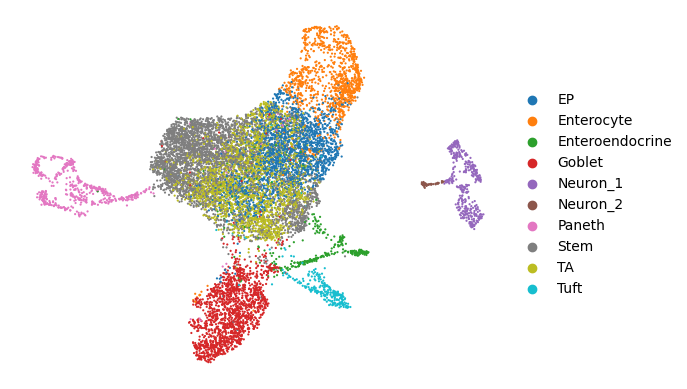

In [43]:
sc.pl.umap(adata, color='Cell_type', title='', frameon=False)

In [56]:
from anndata import AnnData
from liana.mt import rank_aggregate

In [51]:
# creating  a raw layer for liana


# Suppose 'counts' layer has raw counts
# Step 1: Create a new AnnData object with log1p-transformed counts
raw_adata = AnnData(X=np.log1p(adata.layers['counts']),
                    obs=adata.obs.copy(),
                    var=adata.var.copy())

# Step 2: Assign to adata.raw
adata.raw = raw_adata

In [55]:
adata.raw.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 20193010 stored elements and shape (12095, 12030)>

In [57]:
# run cellphonedb
cellphonedb(adata,
            groupby='Cell_type', 
            resource_name='mouseconsensus',
            expr_prop=0.1,
            verbose=True, key_added='cpdb_res')

Using resource `mouseconsensus`.
Using `.raw`!
d:\KU\RGS\.venv\Lib\site-packages\legacy_api_wrap\__init__.py:82: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
d:\KU\RGS\.venv\Lib\site-packages\liana\method\_pipe_utils\_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.61 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 12095 samples and 449 features


100%|██████████| 1000/1000 [00:14<00:00, 68.19it/s]


In [142]:
adata.uns['cpdb_res'].head()

ligand ligand_complex  ligand_means  ligand_props receptor  \
2506   Muc2           Muc2      2.737890      0.902502     Agr2   
2792   Muc2           Muc2      1.806216      0.886578     Agr2   
2729   Muc2           Muc2      1.082482      0.714286     Agr2   
2615   Muc2           Muc2      0.916553      0.703046     Agr2   
5993   Muc2           Muc2      2.737890      0.902502     Agr2   

     receptor_complex  receptor_means  receptor_props    source  target  \
2506             Agr2        4.491964        0.984606    Goblet  Goblet   
2792             Agr2        4.491964        0.984606    Paneth  Goblet   
2729             Agr2        4.491964        0.984606  Neuron_2  Goblet   
2615             Agr2        4.491964        0.984606  Neuron_1  Goblet   
5993             Agr2        2.110548        0.886578    Goblet  Paneth   

      lr_means  cellphone_pvals  size_scaled  
2506  3.614927              0.0          5.0  
2792  3.149090              0.0          5.0  
2729  2.787223              0.0          5.0  
2615  2.704259              0.0          5.0  
5993  2.424219              0.0          5.0

In [66]:
display(adata.uns['cpdb_res'].target.unique())
display(adata.uns['cpdb_res'].receptor.unique())

array(['Goblet', 'Paneth', 'Neuron_2', 'Neuron_1', 'Tuft', 'Enterocyte',
       'EP', 'Enteroendocrine', 'TA', 'Stem'], dtype=object)

array(['Agr2', 'Ptprs', 'Fgfr2', 'Fgfr1', 'Gucy2c', 'Ptprf', 'Igf1r',
       'Cd74', 'Cd151', 'Cadm1', 'Sdc1', 'Aplp2', 'Cd44', 'Dpp4',
       'Adra2a', 'App', 'Cnr1', 'Nrxn1', 'Nlgn2', 'Rpsa', 'Plxna4',
       'Cftr', 'Ackr4', 'Ldlr', 'Tfrc', 'Notch1', 'Cd9', 'Tspan15',
       'Htr1b', 'Gpc1', 'Aplp1', 'Itgb1', 'Adcy1', 'Adcy9', 'Slc16a1',
       'Lrp6', 'Lrp1', 'Slc16a7', 'Adora1', 'Nrp1', 'Lrp10', 'Sort1',
       'Mcam', 'Tnfrsf21', 'Ncstn', 'Rtn4rl1', 'Mttp', 'Dag1', 'Met',
       'Vipr1', 'Abca1', 'Tspan12', 'Ptpra', 'Insr', 'Notch2', 'Itga3',
       'Ephb2', 'Lingo1', 'Lsr', 'Adcy8', 'Cd81', 'Unc5b', 'Amfr',
       'Erbb3', 'Cntnap1', 'Tspan17', 'Sorl1', 'Oprd1', 'Chrm1', 'Erbb2',
       'Ptpru', 'Pld2', 'Chrm3', 'Tspan5', 'Sirpa', 'Cd47', 'Plxna2',
       'Nrxn2', 'Cd300lf', 'Galr1', 'Eno1', 'Bmpr2', 'Ddr1', 'Tspan14',
       'Lamp1', 'Itgb5', 'Nrp2', 'Smap1', 'Bmpr1a', 'Ptprj', 'Dip2a',
       'St14', 'Neo1', 'Ptprk', 'Sdc4', 'Ret', 'Itga2', 'Lrp8', 'Plscr4',
       'Pld1', 'Mc

In [59]:
adata.obs.Cell_type.unique()

['Neuron_1', 'Neuron_2', 'Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine']
Categories (10, object): ['EP', 'Enterocyte', 'Enteroendocrine', 'Goblet', ..., 'Paneth', 'Stem', 'TA', 'Tuft']

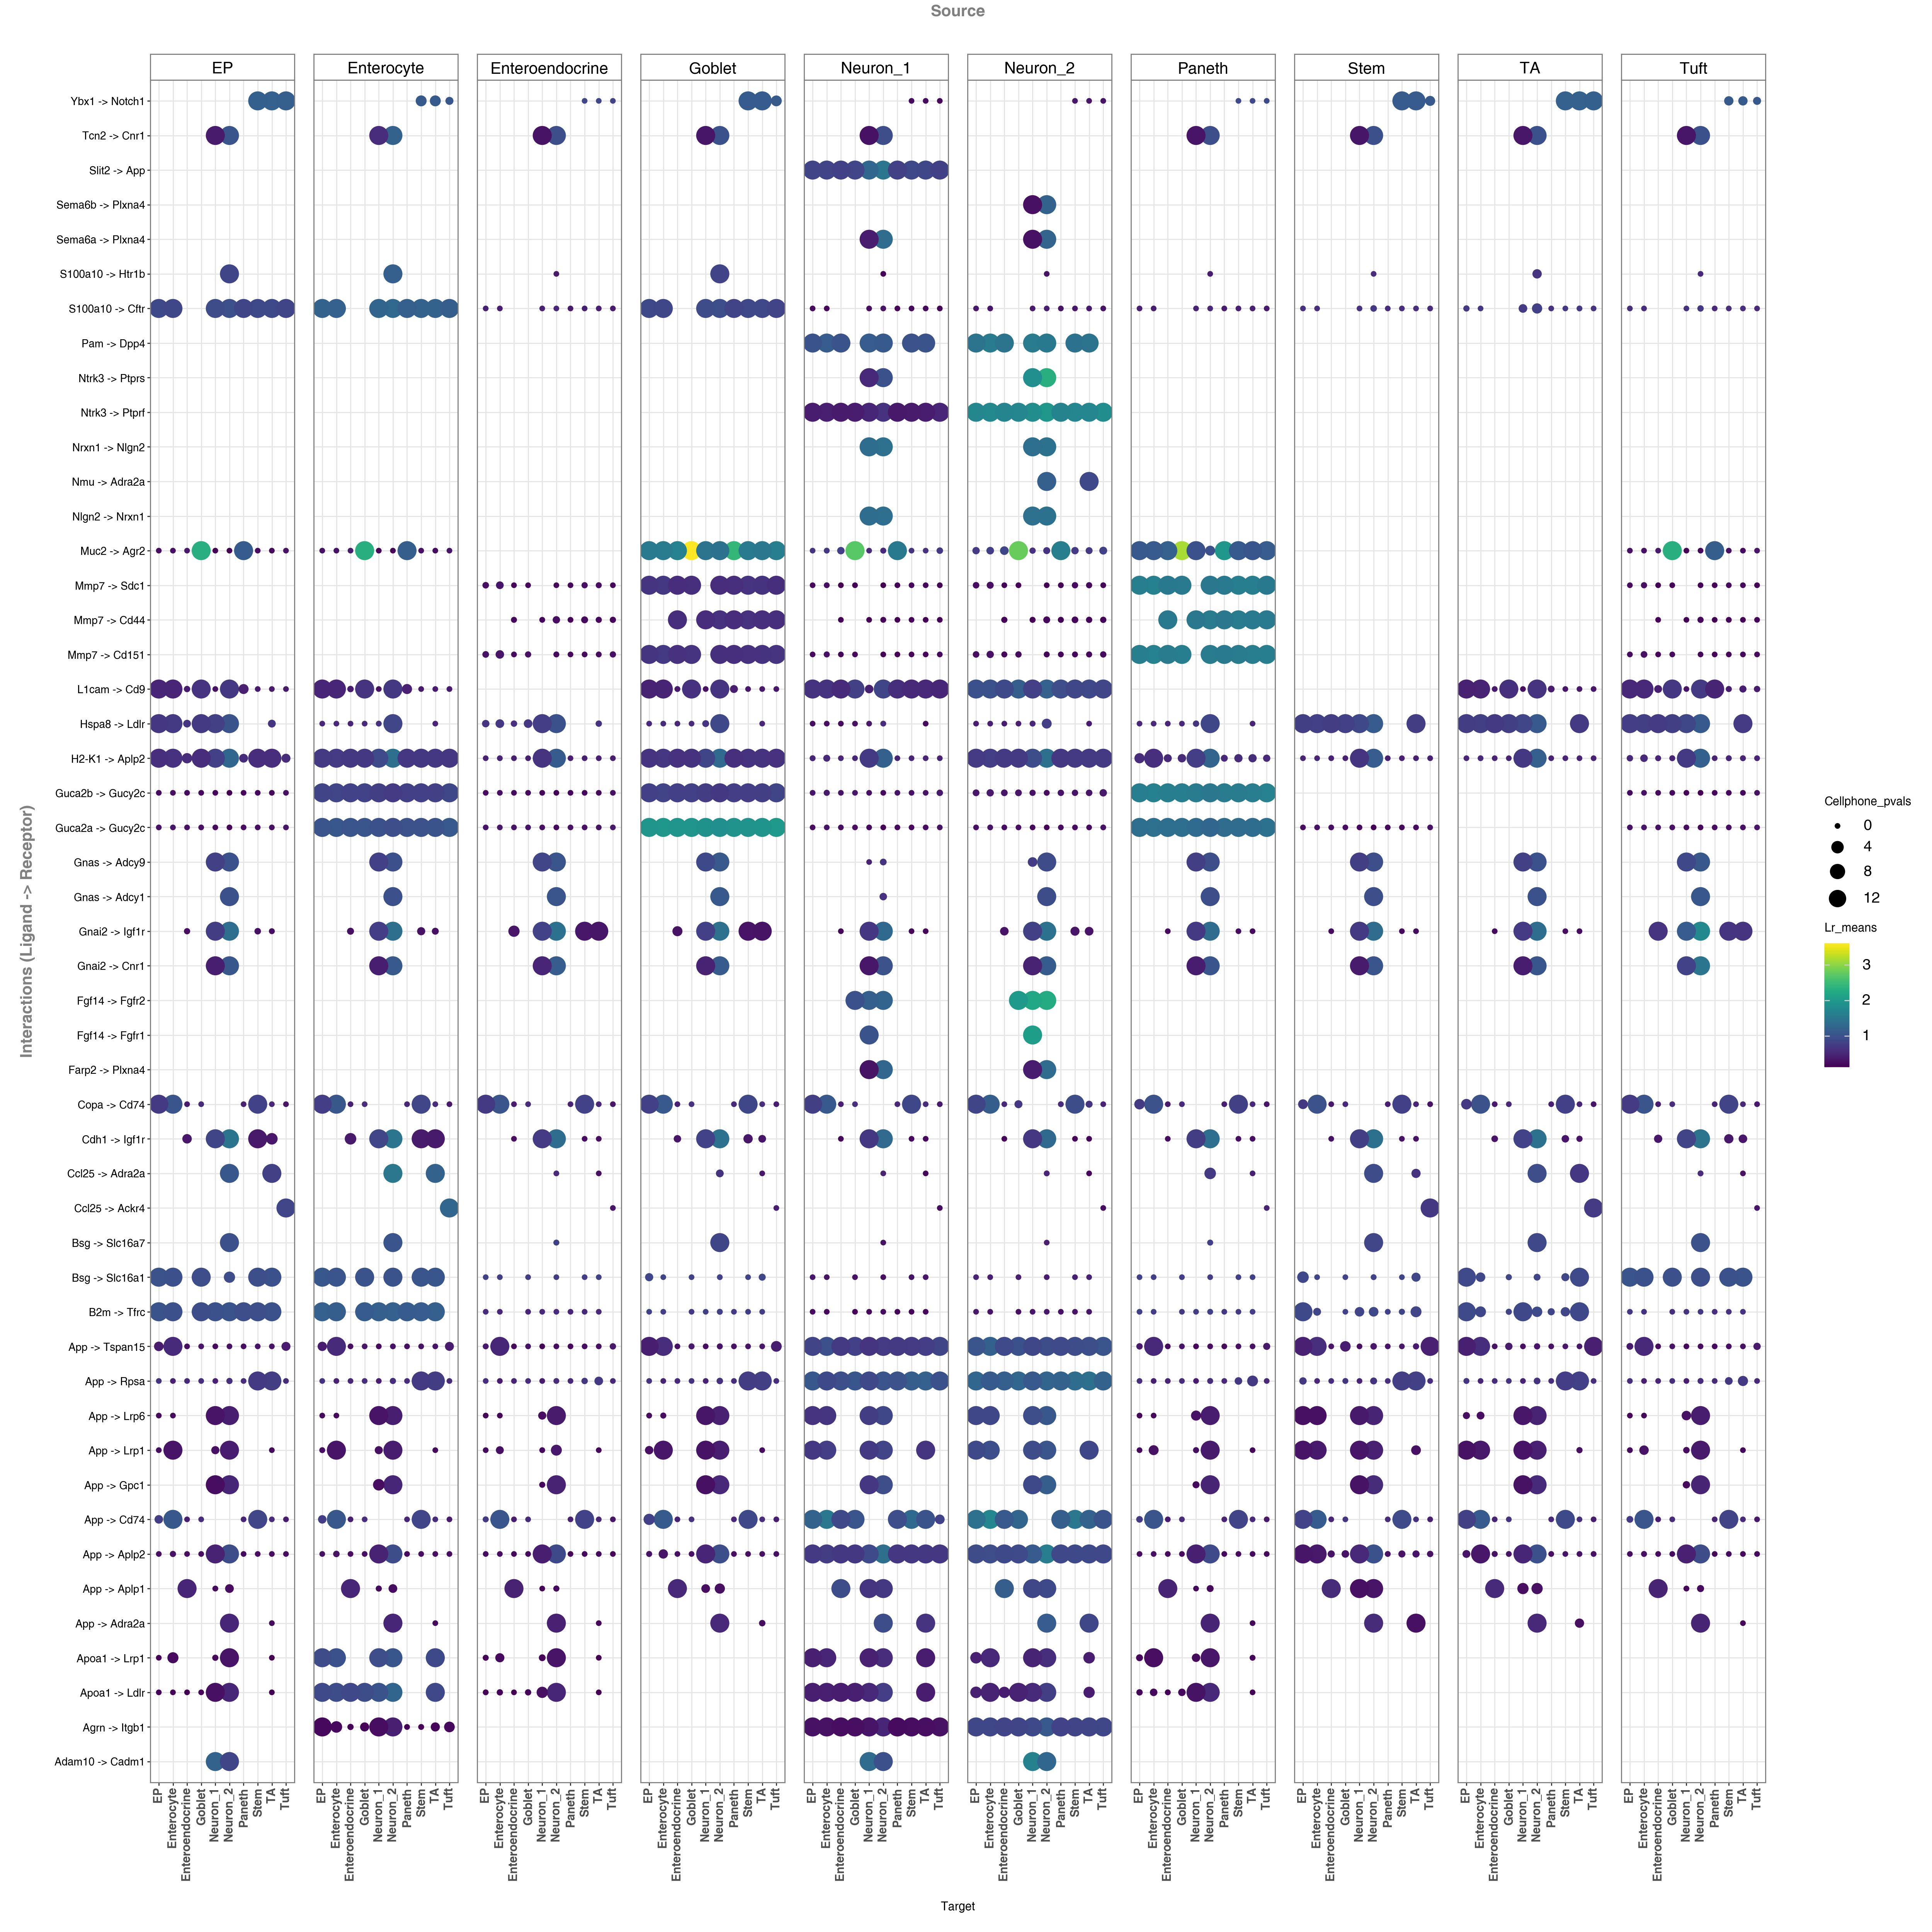

In [ ]:
li.pl.dotplot(
    adata=adata,
    colour='lr_means',          # use mean ligand-receptor expression
    size='cellphone_pvals',     # size of points reflects p-value
    inverse_size=True,          # small p-values → large points
       
    source_labels=['Neuron_1', 'Neuron_2', 'Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine'],  
    target_labels=['Neuron_1', 'Neuron_2', 'Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine'],  
    figure_size=(25, 25),
    filter_fun=lambda x: (x["cellphone_pvals"] <= 0.05) & (x["lr_means"] > 1),
    uns_key='cpdb_res',          # the key in adata.uns with results
)

d:\KU\RGS\.venv\Lib\site-packages\liana\plotting\_common.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


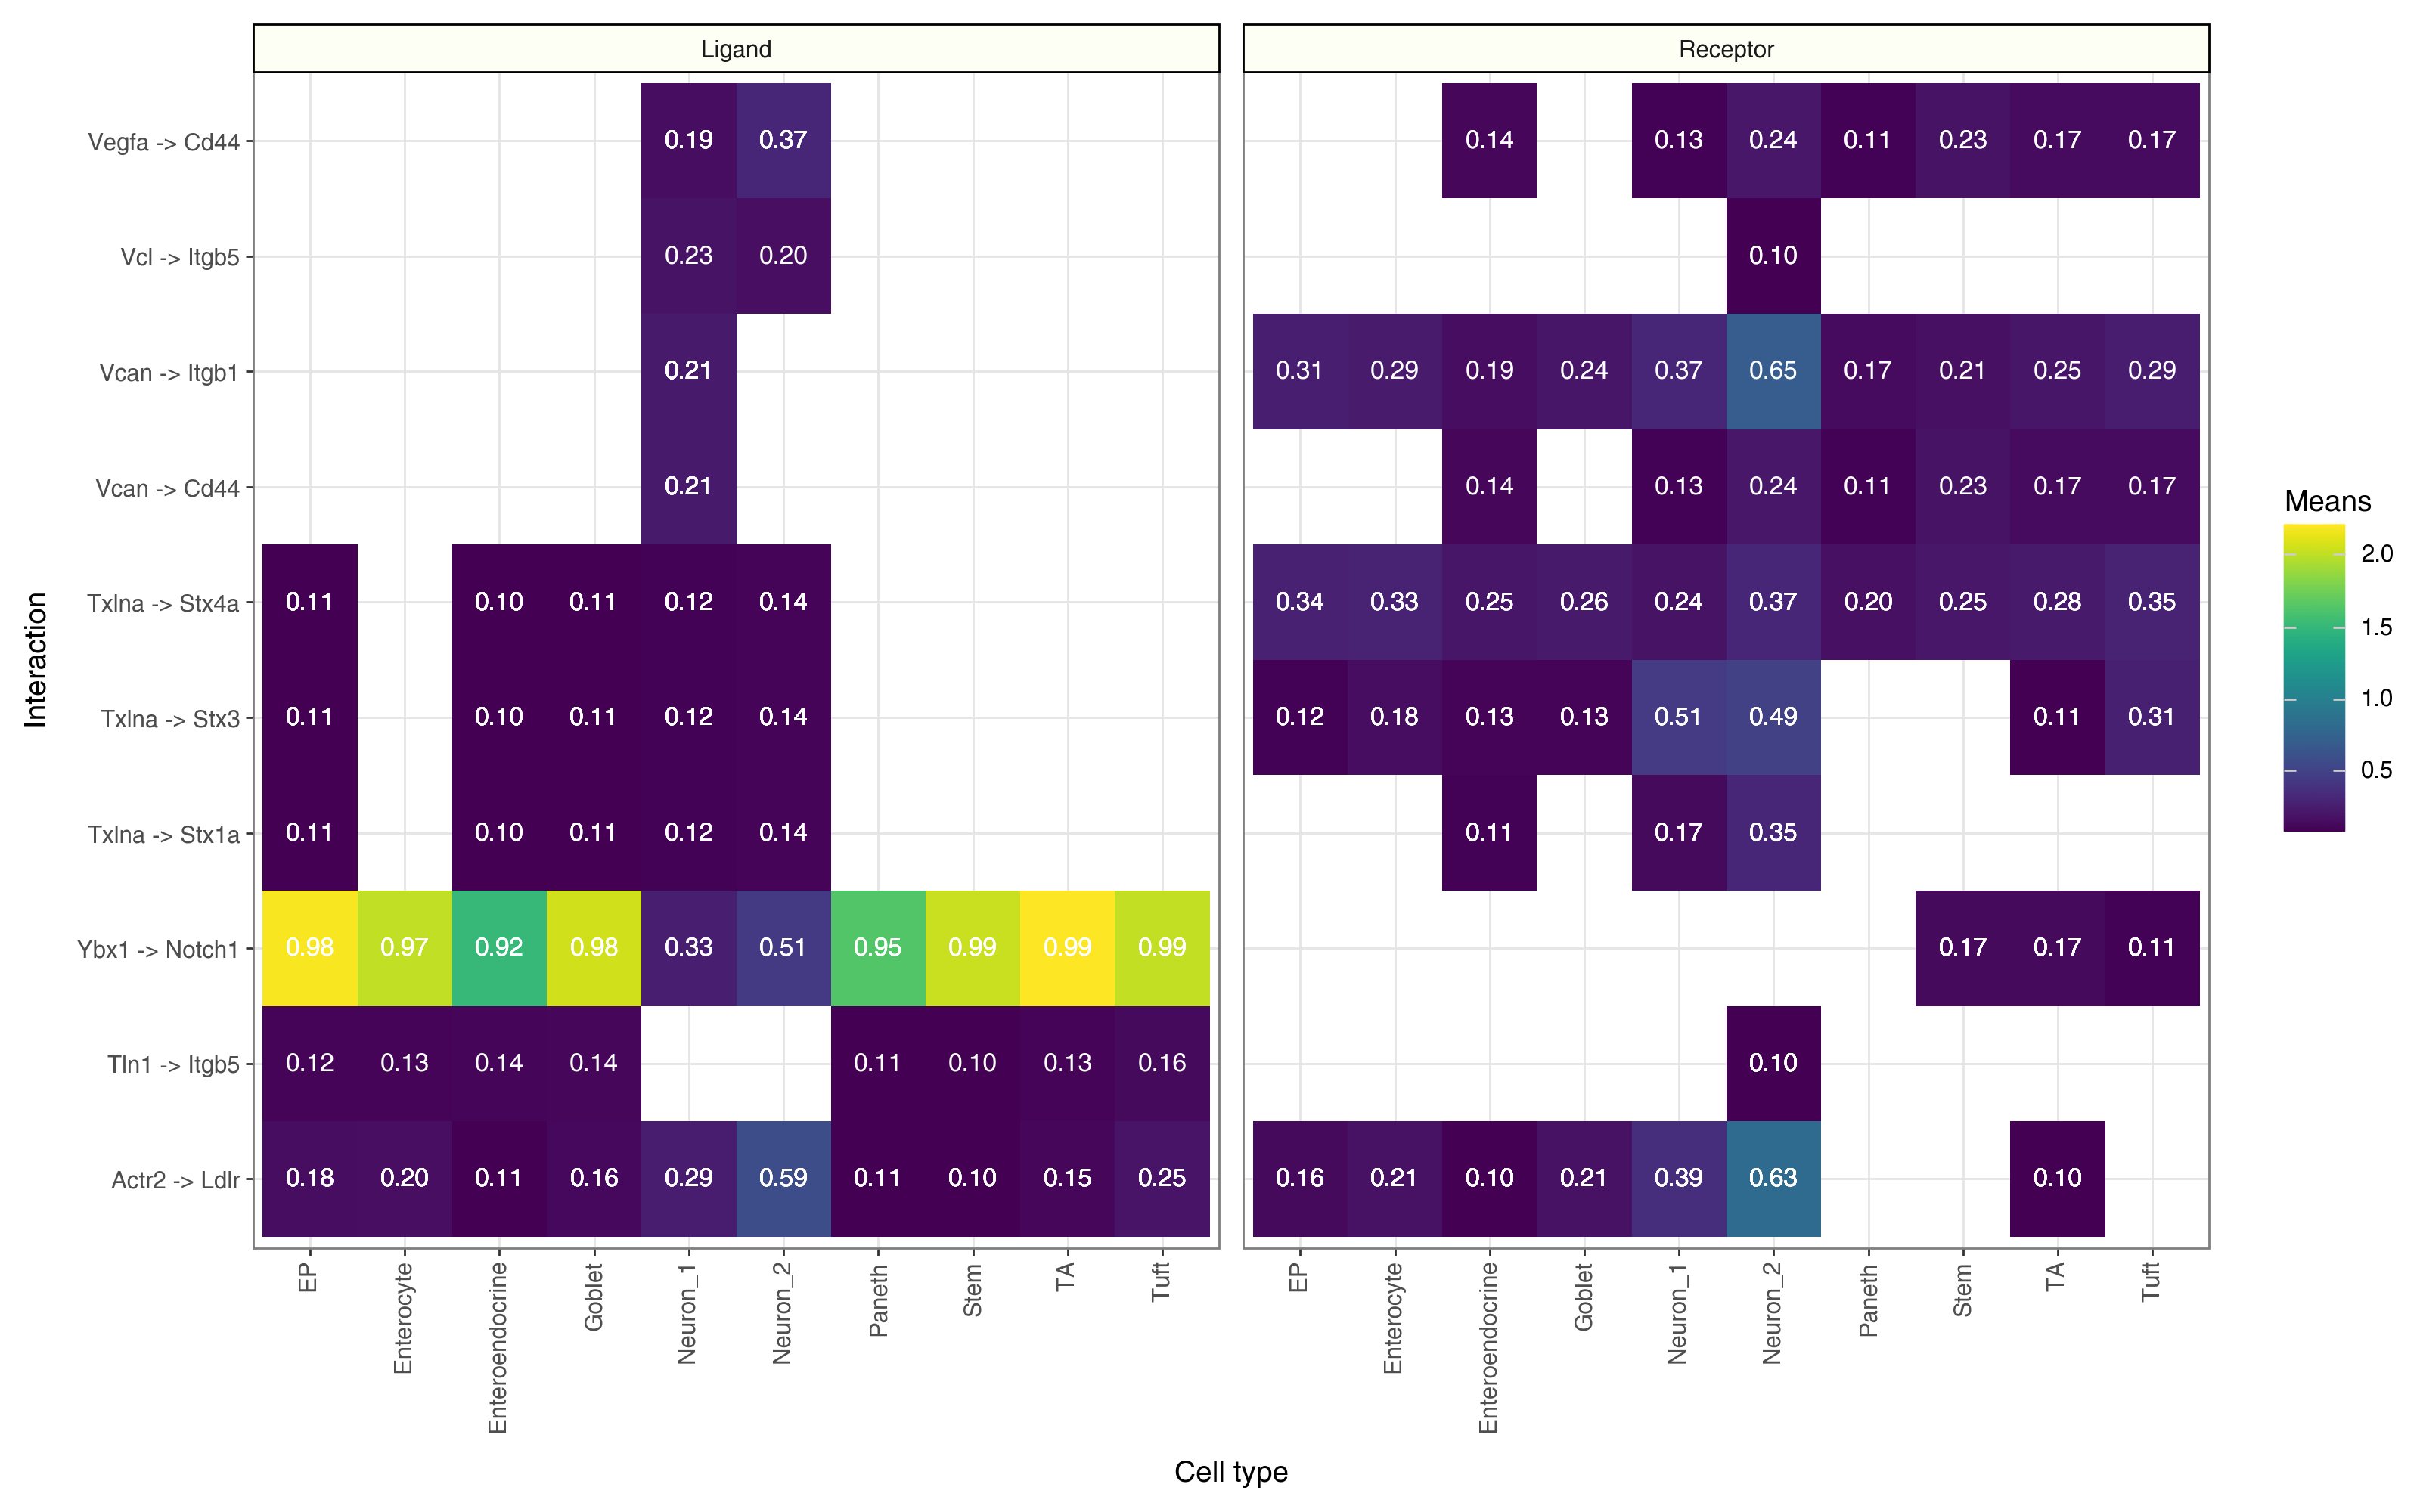

In [ ]:
my_plot = li.pl.tileplot(adata = adata, 
                         # NOTE: fill & label need to exist for both
                         # ligand_ and receptor_ columns
                         fill='means',
                         label='props',
                         label_fun=lambda x: f'{x:.2f}',
                         top_n=10, 
                         orderby='cellphone_pvals',
                         orderby_ascending=True,
                         source_labels=['Neuron_1', 'Neuron_2', 'Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine'],
                         target_labels=['Neuron_1', 'Neuron_2', 'Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine'],
                         uns_key='cpdb_res', # NOTE: default is 'liana_res'
                         source_title='Ligand',
                         target_title='Receptor',
                         figure_size=(16, 10)
                         )
my_plot

# Prior Knowledge 
# Ligand-Receptor Interactions

In [129]:
resource = li.rs.select_resource('mouseconsensus')
resource.head()

ligand     receptor
31371   Dll1       Notch1
31372   Dll1       Notch2
31373   Dll1       Notch4
31374   Dll1       Notch3
31375   Nrg2  Erbb2_Erbb3

In [139]:
li.rs.get_metalinks_values(table_name='disease', column_name='disease')[0:25]

['Molybdenum cofactor deficiency',
 'Metastatic melanoma',
 'Schizophrenia',
 'Anoxia',
 'Colorectal cancer',
 '2-Ketoglutarate dehydrogenase complex deficiency',
 'Eosinophilic esophagitis',
 'D-2-hydroxyglutaric aciduria',
 'Hyperinsulinism-hyperammonemia syndrome',
 'Fumarase deficiency',
 'Amish lethal microcephaly',
 'Deafness',
 ' Onychodystrophy',
 ' Osteodystrophy',
 ' Mental Retardation',
 ' and Seizures Syndrome',
 'Dihydrolipoamide Dehydrogenase Deficiency',
 'Lipoyltransferase 1 Deficiency',
 'Alzheimers disease',
 'Cerebrotendinous xanthomatosis',
 'Multiple sclerosis',
 'Oculocerebrorenal syndrome',
 'Parkinsons disease',
 'Primary hypomagnesemia',
 'Bartter Syndrome']

In [138]:
li.rs.get_metalinks_values(table_name='disease', column_name='disease')[0:5]

['Molybdenum cofactor deficiency',
 'Metastatic melanoma',
 'Schizophrenia',
 'Anoxia',
 'Colorectal cancer']

# Rank Aggregate

In [161]:
li.mt.rank_aggregate(adata, 
                     groupby='Cell_type',
                     resource_name='mouseconsensus',
                     expr_prop=0.1,
                     verbose=True)

Using resource `mouseconsensus`.
Using `.raw`!
d:\KU\RGS\.venv\Lib\site-packages\legacy_api_wrap\__init__.py:82: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
d:\KU\RGS\.venv\Lib\site-packages\liana\method\_pipe_utils\_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.61 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 12095 samples and 449 features
Assuming that counts were `natural` log-normalized!


C:\Users\Zhenia\anaconda3\Lib\functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
d:\KU\RGS\.venv\Lib\site-packages\liana\method\sc\_liana_pipe.py:262: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.


Running CellPhoneDB


100%|██████████| 1000/1000 [00:19<00:00, 50.84it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


In [170]:
adata.uns['liana_res'].head()

source  target ligand_complex receptor_complex  lr_means  \
2470    Goblet  Goblet           Muc2             Agr2  3.614927   
5874    Paneth  Goblet           Muc2             Agr2  3.149090   
4712  Neuron_2  Goblet           Muc2             Agr2  2.787223   
2771    Goblet  Paneth           Muc2             Agr2  2.424219   
3409  Neuron_1  Goblet           Muc2             Agr2  2.704259   

      cellphone_pvals  expr_prod  scaled_weight  lr_logfc  spec_weight  \
2470              0.0  12.298504       2.129688  5.061201     0.192837   
5874              0.0   8.113459       1.707273  3.362807     0.127217   
4712              0.0   4.862469       1.379138  2.781855     0.076242   
2771              0.0   5.778447       1.378089  1.892342     0.090604   
3409              0.0   4.117123       1.303907  2.623723     0.064555   

       lrscore  specificity_rank  magnitude_rank  
2470  0.961798          0.001564    1.266047e-07  
5874  0.953378          0.007586    5.063789e-07  
4712  0.940584          0.021149    2.025195e-06  
2771  0.945228          0.021278    3.164117e-06  
3409  0.935761          0.027635    4.555969e-06

In [163]:
rank_aggregate.describe()

Rank_Aggregate returns `magnitude_rank`, `specificity_rank`. magnitude_rank and specificity_rank respectively represent an aggregate of the `magnitude`- and `specificity`-related scoring functions from the different methods.


d:\KU\RGS\.venv\Lib\site-packages\liana\plotting\_common.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


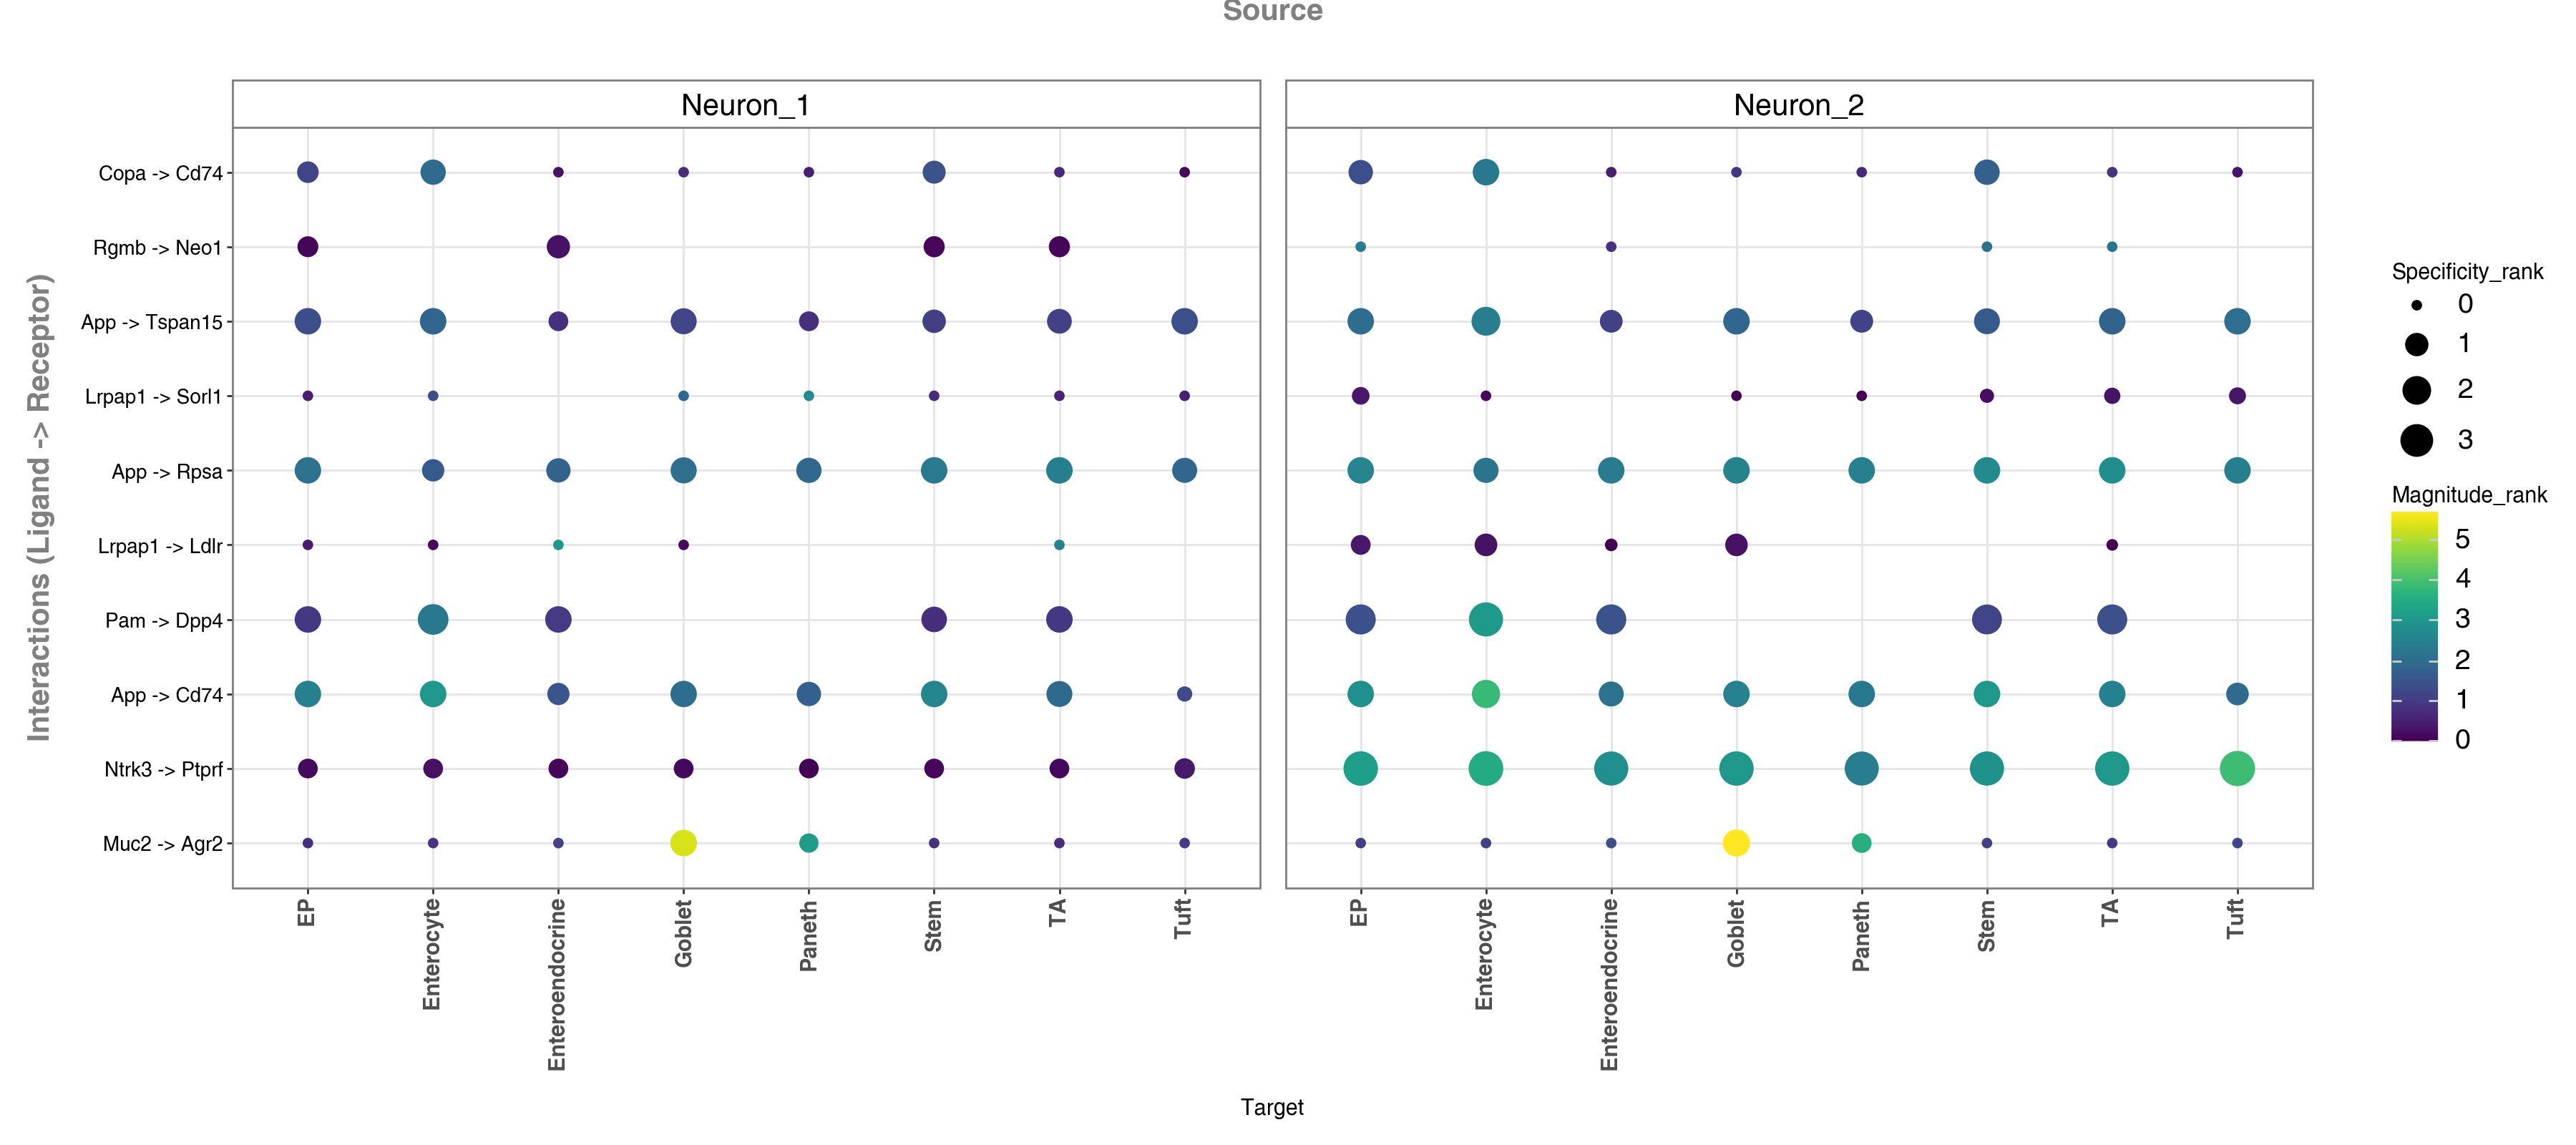

In [166]:
li.pl.dotplot(adata = adata, 
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['Neuron_1', 'Neuron_2'],
              target_labels=['Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine'],
              top_n=10, 
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(18, 8)
             )

d:\KU\RGS\.venv\Lib\site-packages\liana\plotting\_common.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


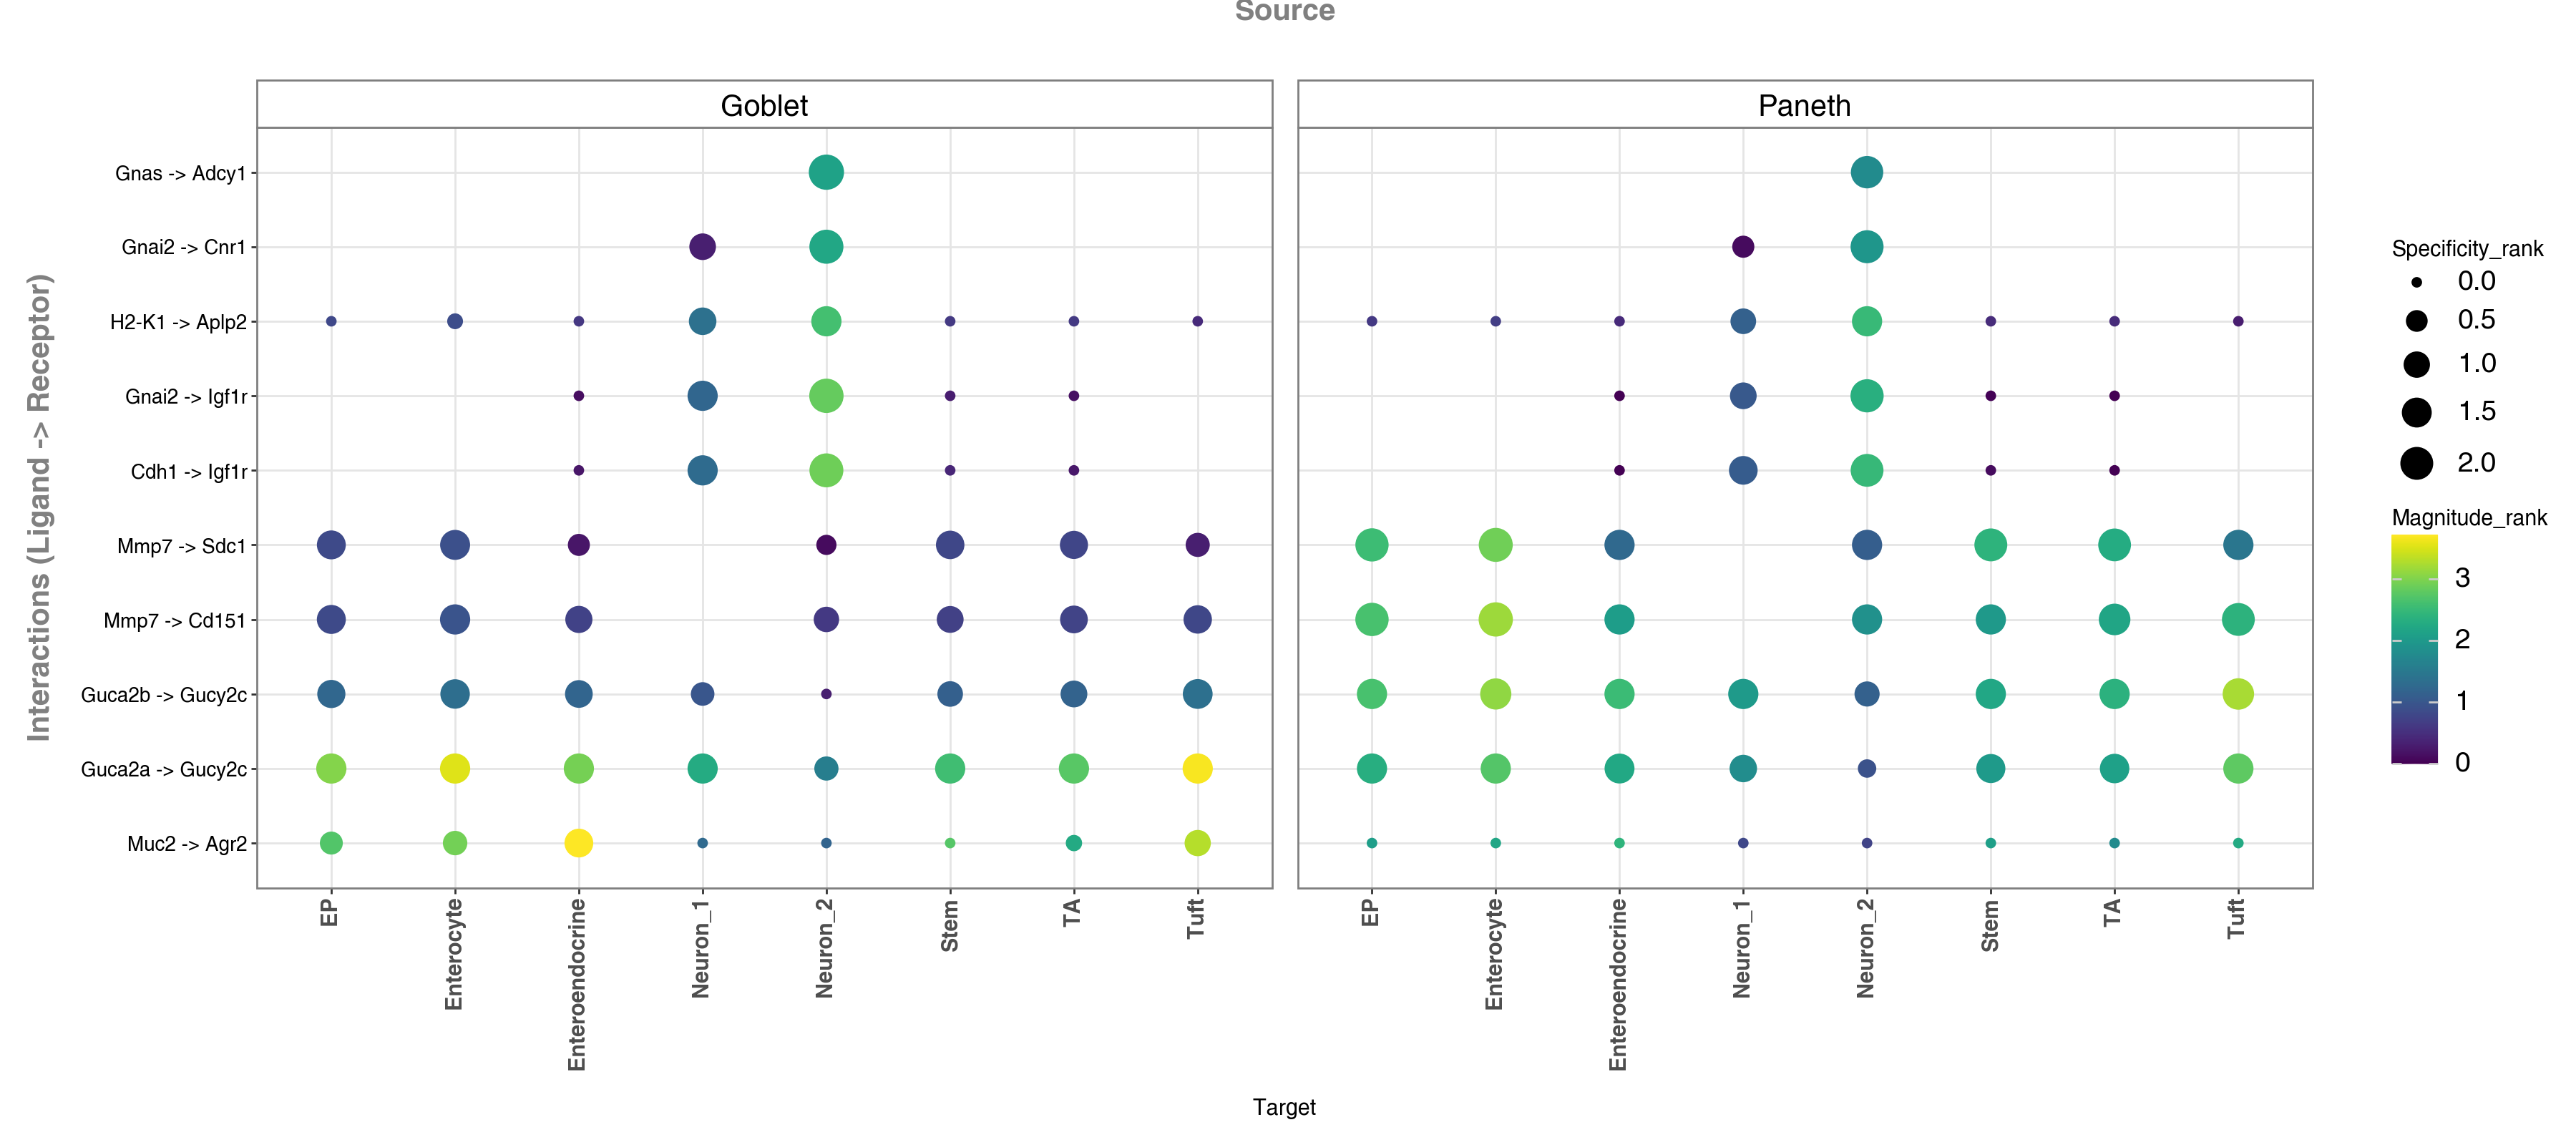

In [230]:
li.pl.dotplot(adata = adata, 
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['Goblet', 'Paneth'],
              target_labels=['Neuron_1', 'Neuron_2','Enterocyte', 'Stem', 'TA', 'EP', 'Tuft', 'Enteroendocrine'],
              top_n=10, 
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(18, 8)
             )

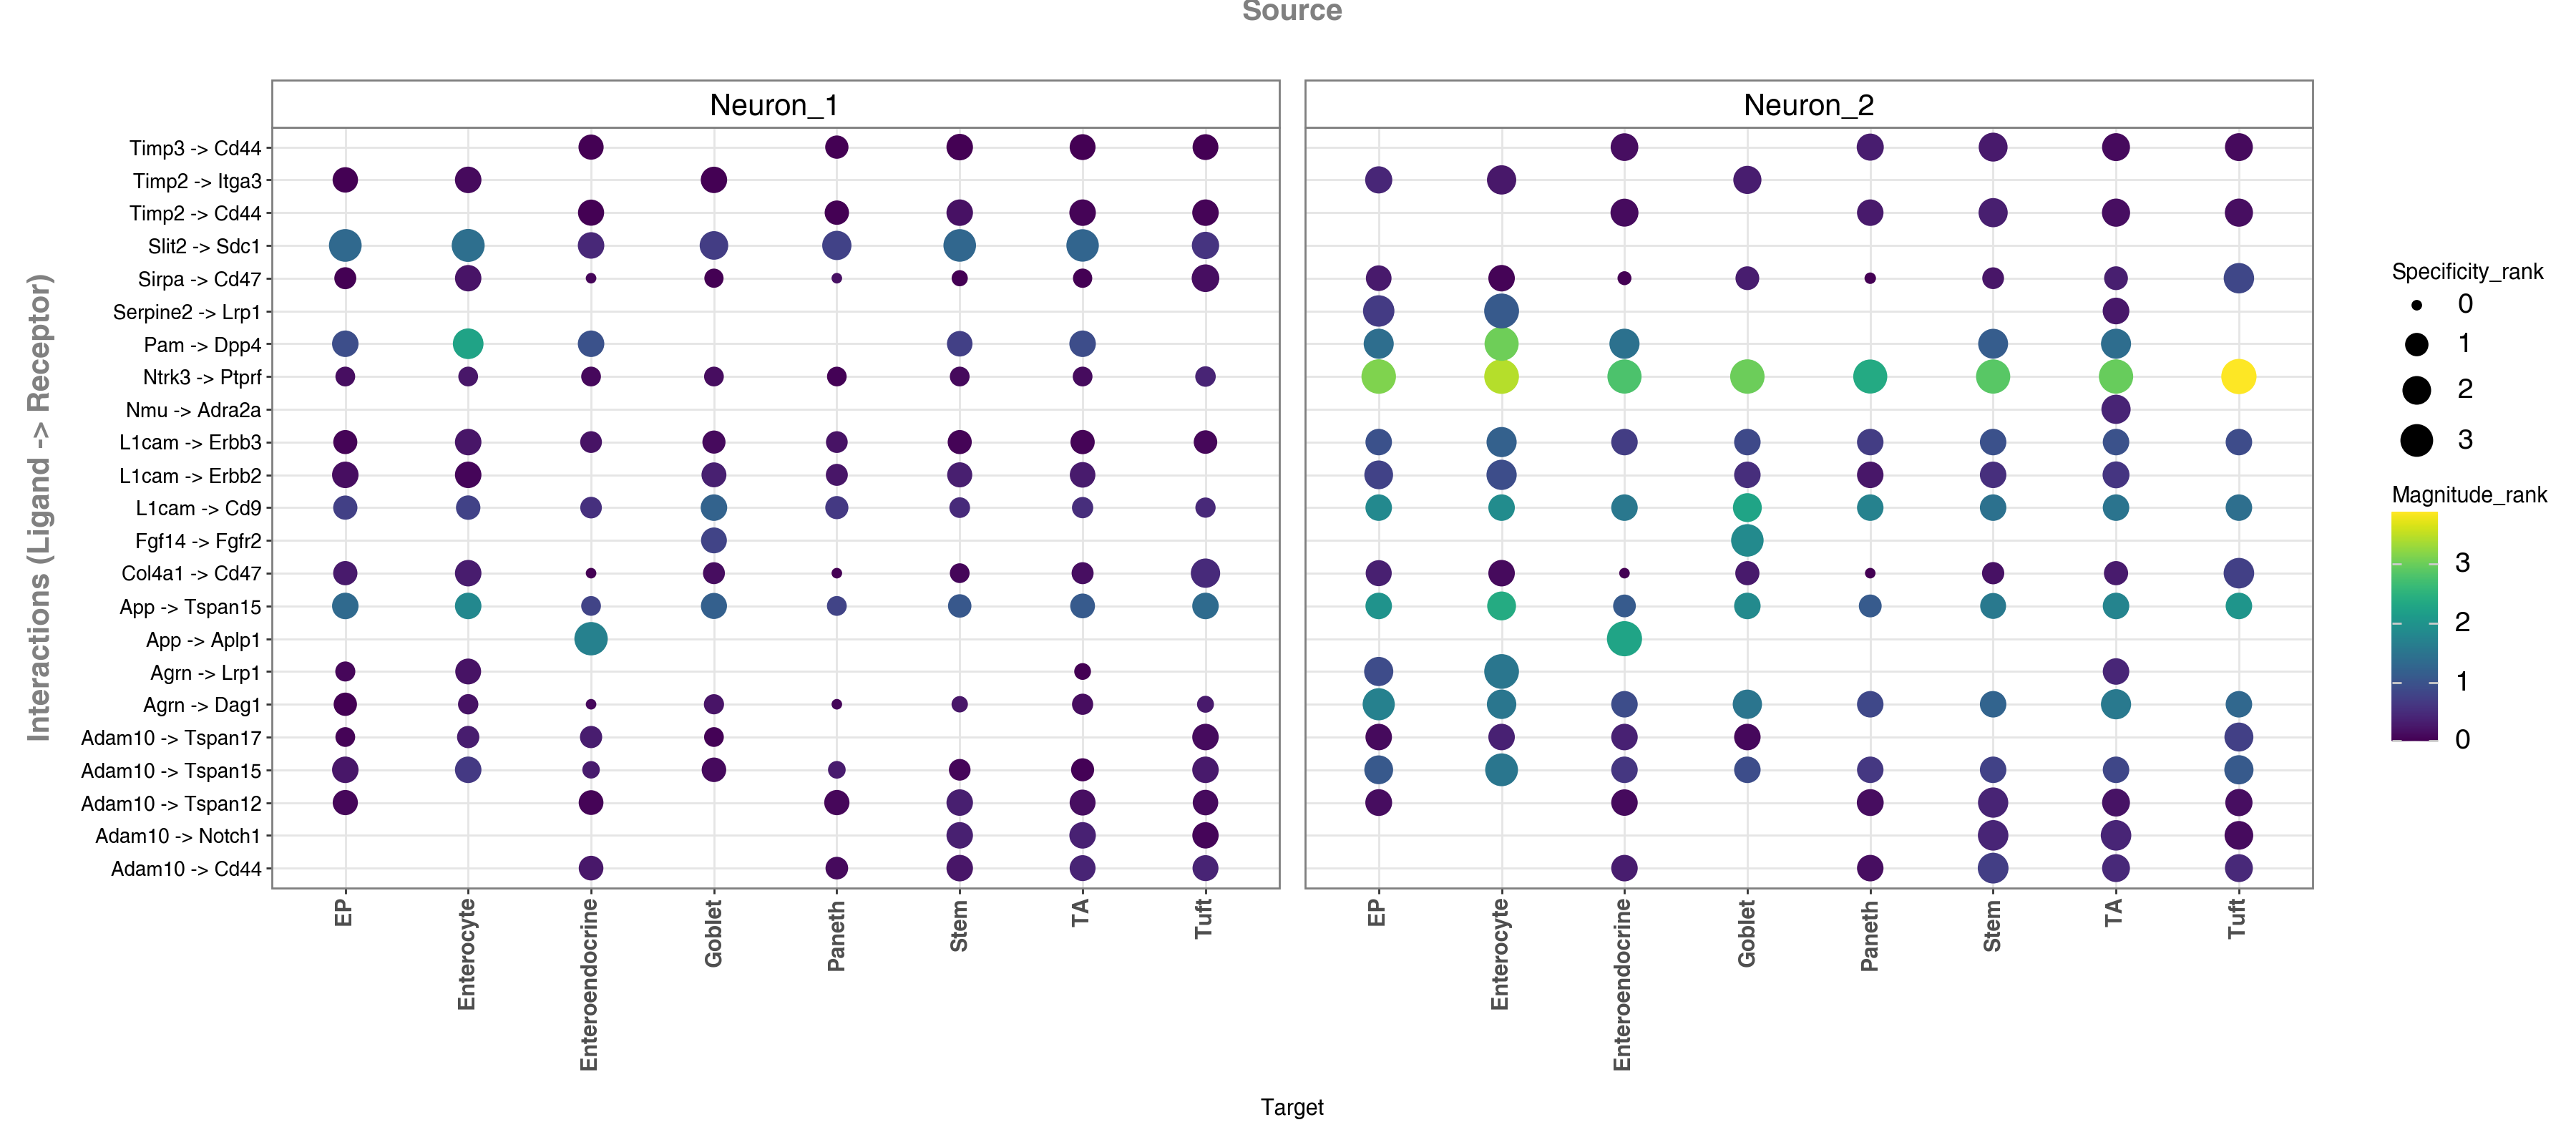

In [172]:
# treat the ranks provided by RRA as a probability distribution to which we can filter 
# interactions according to how robustly and highly ranked they are across the different methods.
my_plot = li.pl.dotplot(adata = adata, 
                        colour='magnitude_rank',
                        inverse_colour=True,
                        size='specificity_rank',
                        inverse_size=True,
                        source_labels=['Neuron_1', 'Neuron_2'],
                        target_labels=['Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine'],
                        filter_fun=lambda x: x['specificity_rank'] <= 0.01, 
                        figure_size=(18, 8),
                        orderby_ascending=True,
                       )
my_plot

<Axes: >

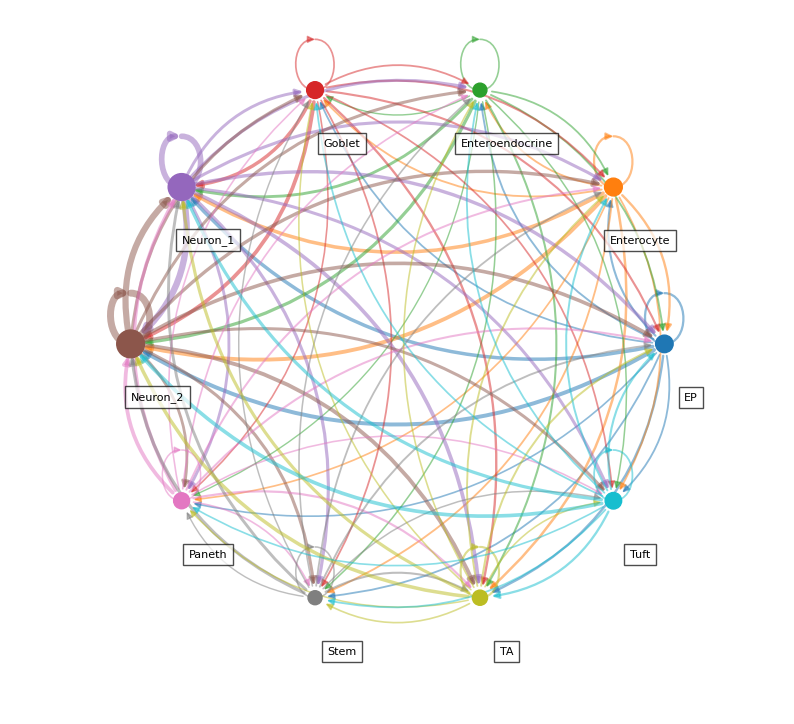

In [106]:
li.pl.circle_plot(adata,
                  groupby='Cell_type',
                  score_key='magnitude_rank',
                  inverse_score=True,
                  source_labels=['Neuron_1', 'Neuron_2', 'Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine'],
                  target_labels=['Neuron_1', 'Neuron_2', 'Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine'],
                  filter_fun=lambda x: x['specificity_rank'] <= 0.05,
                  pivot_mode='counts', # NOTE: this will simply count the interactions, 'mean' is also available
                  figure_size=(10, 10),
                  )

<Axes: >

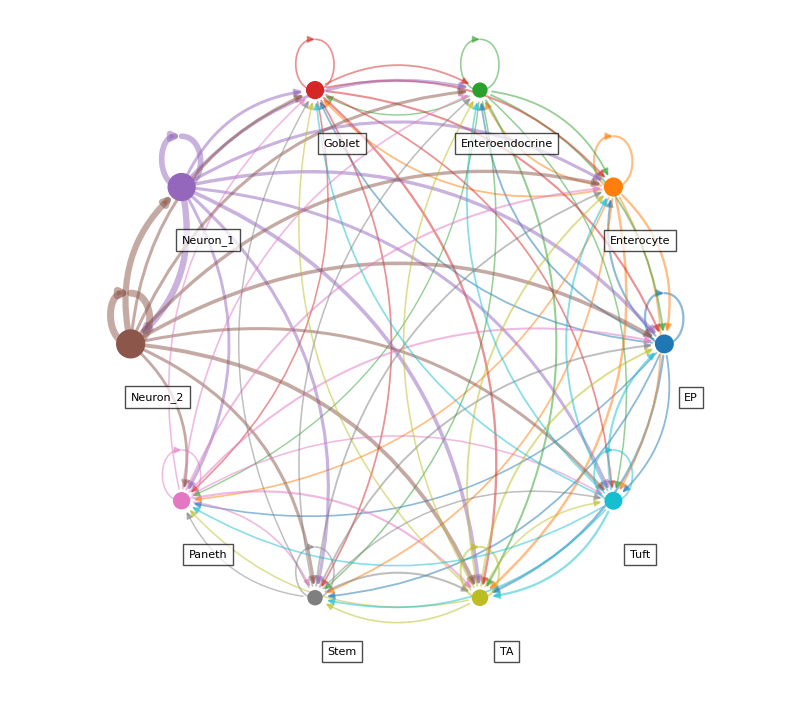

In [157]:
li.pl.circle_plot(adata,
                  groupby='Cell_type',
                  score_key='magnitude_rank',
                  inverse_score=True,
                  source_labels=['Neuron_1', 'Neuron_2'],
                  target_labels=['Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine'],
                  filter_fun=lambda x: x['specificity_rank'] <= 0.05,
                  pivot_mode='counts', # NOTE: this will simply count the interactions, 'mean' is also available
                  figure_size=(10, 10),
                  )

<Axes: >

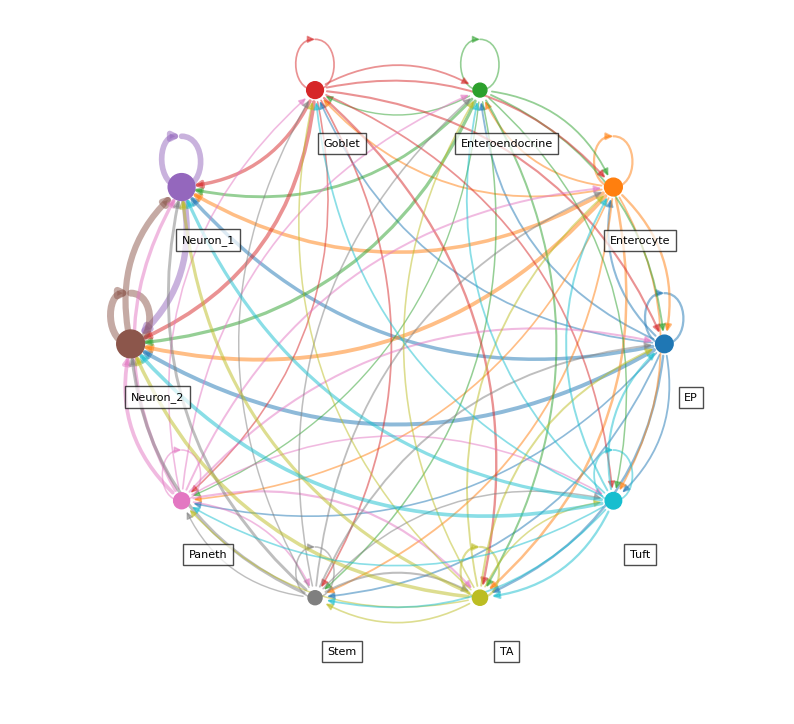

In [156]:
li.pl.circle_plot(adata,
                  groupby='Cell_type',
                  score_key='magnitude_rank',
                  inverse_score=True,
                  source_labels=['Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine'],
                  target_labels=['Neuron_1', 'Neuron_2'],
                  filter_fun=lambda x: x['specificity_rank'] <= 0.05,
                  pivot_mode='counts', # NOTE: this will simply count the interactions, 'mean' is also available
                  figure_size=(10, 10),
                  )

## Differential analysis

In [107]:
adata.obs['Cell_type'].value_counts()

Cell_type
Stem               3678
TA                 2305
EP                 1955
Goblet             1559
Enterocyte         1038
Paneth              529
Neuron_1            394
Enteroendocrine     323
Tuft                265
Neuron_2             49
Name: count, dtype: int64

In [108]:
neurons = adata[adata.obs['Cell_type'].isin(['Neuron_1', 'Neuron_2'])].copy()
epithelial = adata[adata.obs['Cell_type'].isin([
    'Goblet', 'Enterocyte', 'Stem', 'TA', 'Paneth', 'EP', 'Tuft', 'Enteroendocrine'
])].copy()

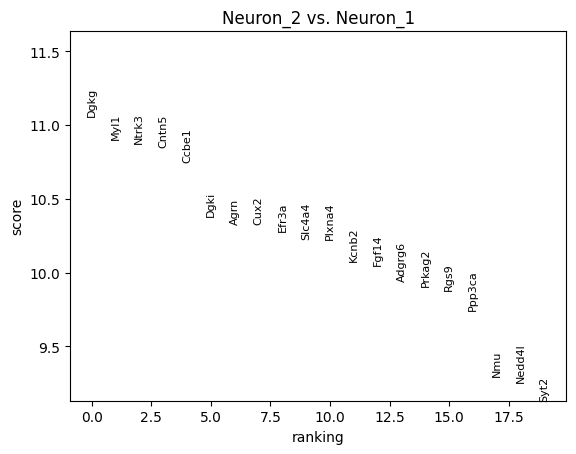

In [109]:
sc.tl.rank_genes_groups(
    neurons,                     # AnnData with neurons only
    groupby='Cell_type',         # column to define groups
    reference='Neuron_1',        # comparison group
    method='wilcoxon',           # statistical test
    pts=True                      # include fraction of cells expressing gene
)

# Check top DE genes
sc.pl.rank_genes_groups(neurons, n_genes=20, sharey=False)

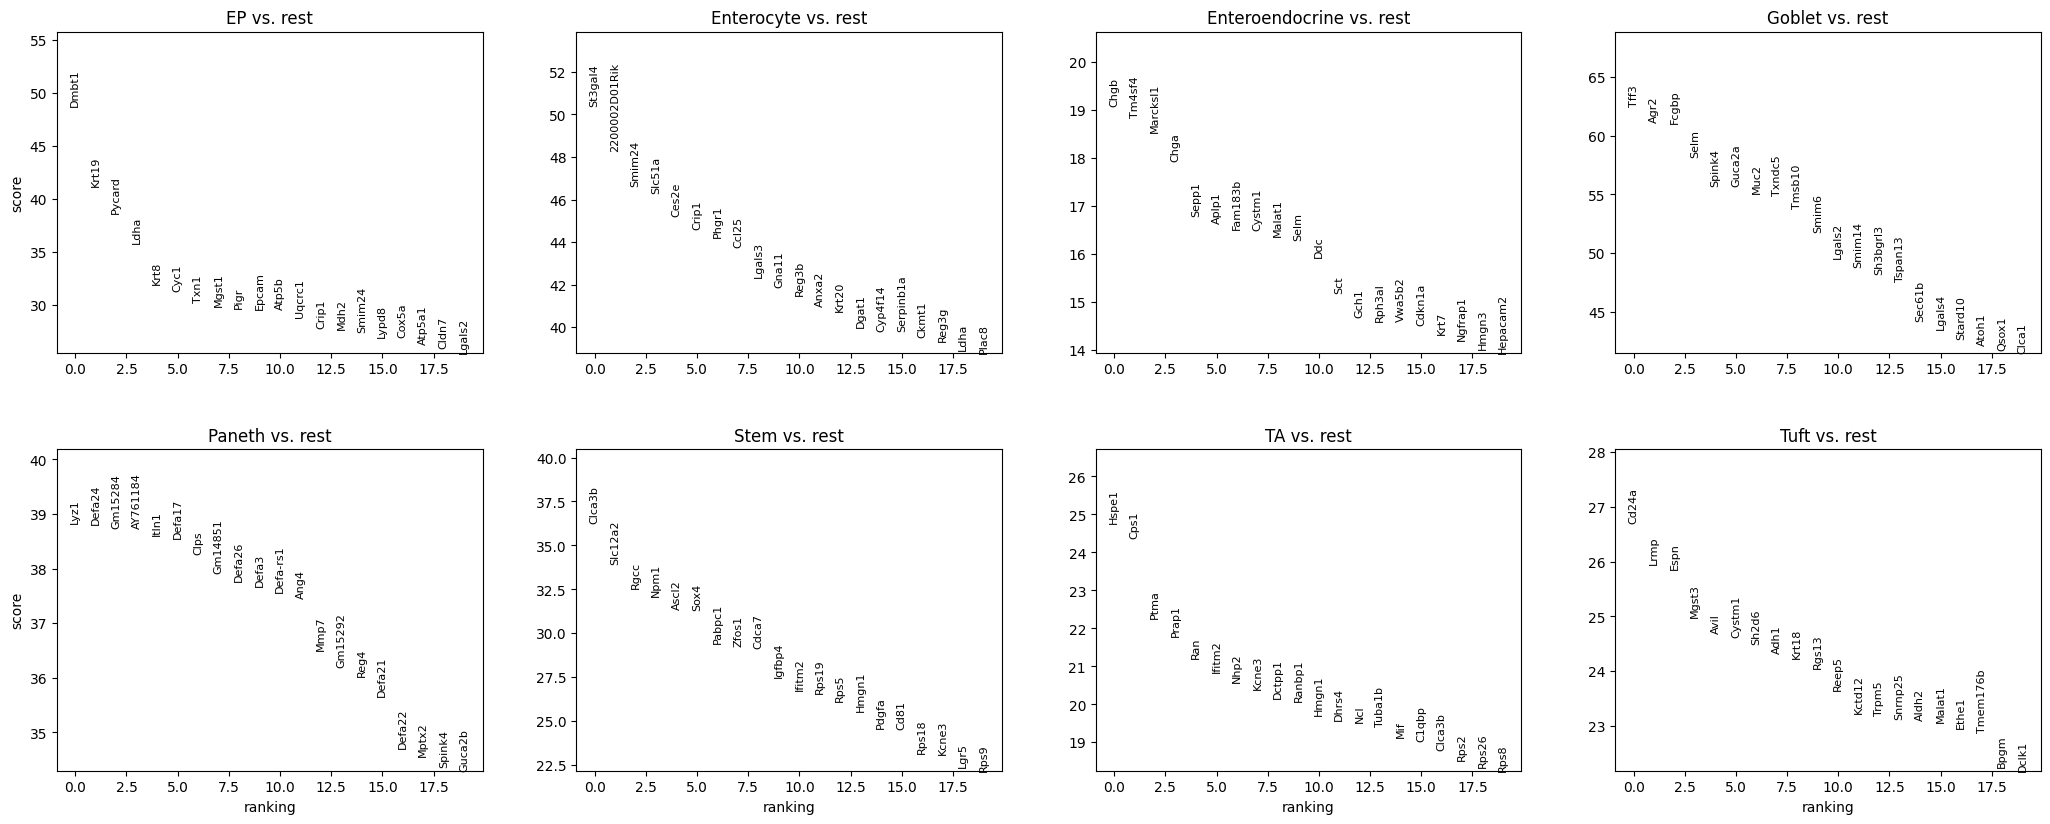

In [111]:
sc.tl.rank_genes_groups(
    epithelial,
    groupby='Cell_type',    # each epithelial type vs rest
    method='wilcoxon',
    pts=True
)
sc.pl.rank_genes_groups(epithelial, n_genes=20, sharey=False)

In [112]:
# Create a new column: 'cell_class' = 'Neuron' or 'Epithelial'
adata.obs['cell_class'] = adata.obs['Cell_type'].apply(
    lambda x: 'Neuron' if x in ['Neuron_1', 'Neuron_2'] else 'Epithelial'
)

# Check counts
adata.obs['cell_class'].value_counts()

cell_class
Epithelial    11652
Neuron          443
Name: count, dtype: int64

In [113]:
sc.tl.rank_genes_groups(
    adata,
    groupby='cell_class',     # column with two groups
    reference='Neuron',       # Neurons as reference
    method='wilcoxon',        # non-parametric test suitable for scRNA-seq
    pts=True                  # include fraction of cells expressing gene
)

... storing 'cell_class' as categorical


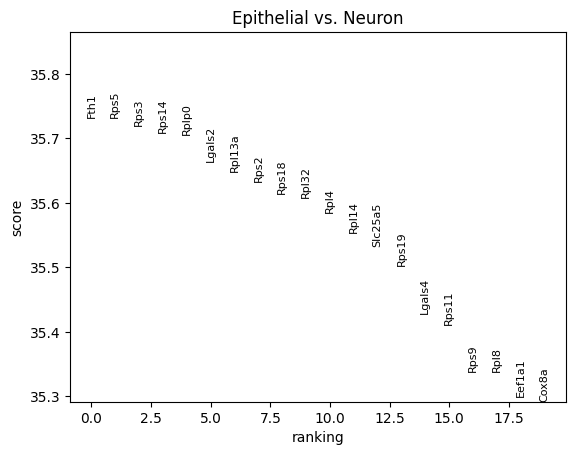

In [125]:
sc.pl.rank_genes_groups(
    adata,
    n_genes=20,
    sharey=False,
    method='wilcoxon',    # make sure DE method supports ranking
    use_raw=True,         # use raw counts if available
    figsize=(12,6),
    cmap='viridis',
    frameon=False
)


In [115]:
de_results = sc.get.rank_genes_groups_df(adata, group='Epithelial')
de_results.head()

names     scores  logfoldchanges          pvals      pvals_adj  \
0   Fth1  35.732475        6.795487  1.238255e-279  7.555957e-276   
1   Rps5  35.732075        8.089958  1.256186e-279  7.555957e-276   
2   Rps3  35.719769        8.228023  1.950303e-279  7.820717e-276   
3  Rps14  35.708664        7.217832  2.900505e-279  7.934023e-276   
4  Rplp0  35.705074        7.801434  3.297599e-279  7.934023e-276   

   pct_nz_group  
0      0.999743  
1      0.999228  
2      0.998884  
3      0.999142  
4      0.998798

## Intercellular Context Factorization with MOFA

In [147]:
import plotnine as p9
# load muon and mofax
import muon as mu
import mofax as mofa
import decoupler as dc

In [148]:
net = dc.op.progeny(organism='mouse', top=5000, thr_padj=0.25)

In [152]:
lr_pairs = li.rs.select_resource('mouseconsensus')

In [153]:
lr_progeny = li.rs.generate_lr_geneset(lr_pairs, net, lr_sep="^").rename(columns = {'interaction': 'target'})
lr_progeny.head()

source          target    weight
1       EGFR     Dll1^Notch1 -1.000584
42      NFkB     Dll1^Notch2  0.809955
69      NFkB     Dll1^Notch4  0.677967
88   Hypoxia     Dll1^Notch3  1.049842
119     MAPK  Adam10^Tspan15 -0.925489

In [199]:
adata

AnnData object with n_obs × n_vars = 12095 × 12030
    obs: 'Annotation', 'Mouse_ID', 'Unique_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'cell_type', 'dataset', 'density_X_umap_harmony_sample', 'Cell_type', 'cell_class'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts-adata_ep', 'mean_counts-adata_ep', 'log1p_mean_counts-adata_ep', 'pct_dropout_by_counts-adata_ep', 'total_counts-adata_ep', 'log1p_total_counts-adata_ep', 'n_cells-adata_ep', 'highly_variable-adata_ep', 'means-adata_ep', 'dispersions-adata_ep', 'dispersions_norm-adata_ep', 'highly_variable_nbatches-adata_ep', 'highly_variable_intersection-adata_ep', 'n_cells_by_counts-gc_neur', 'mean_counts-gc_neur', 'log1p_mean_

In [203]:
adata.uns["cell_class"] = adata.obs["cell_class"].copy()

In [ ]:
lr_loadings =  li.ut.get_variable_loadings(adata,
                                           varm_key='LFs',
                                           view_sep=':',
                                           )
lr_loadings.set_index('variable', inplace=True)
# pivot views to wide
lr_loadings = lr_loadings.pivot(columns='view', values='Factor1')
# replace NaN with 0
lr_loadings.replace(np.nan, 0, inplace=True)
lr_loadings.head()

In [179]:
import gseapy as gp
from gseapy import Biomart

In [175]:
# Extract results
liana_res = adata.uns['liana_res']

In [184]:
libs = gp.get_library_name()
print(libs)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'COMPARTMENTS_Curated_2025', 'COMPARTMENTS_Experimental_2025', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'ClinVar_2025', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_201

In [ ]:
# Rank ligands (example: lrscore as ranking metric)
ranked_ligands = (
    liana_res[['ligand_complex', 'lrscore']]
    .groupby('ligand_complex')
    .mean()
    .sort_values('lrscore', ascending=False)
)

# Run GSEA (mouse KEGG as example)
pre_res = gp.prerank(
    rnk=ranked_ligands,
    gene_sets='KEGG_2019_Mouse',  
    processes=4,
    permutation_num=1000,     # increase for stable p-values
    outdir='gsea_mouse_ligands',
    seed=42,
)

C:\Users\Zhenia\AppData\Local\Temp\ipykernel_20796\2238301704.py:10: DeprecationWarning: processes is deprecated; use threads
2025-09-26 14:43:43,556 [WARNING] Duplicated values found in preranked stats: 0.65% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [195]:
def plot_gsea_bar(res2d: pd.DataFrame, title: str = "GSEA (pre-ranked)",
                  top_n: int = 20, fdr_thresh: float = 0.05):
    """
    res2d: gseapy.prerank(...).res2d (DataFrame). Expected columns: 'Term','NES','FDR q-val' (or 'fdr')
    """
    df = res2d.copy()

    # Handle column name variations across gseapy versions
    col_term = "Term" if "Term" in df.columns else "term"
    col_nes = "NES" if "NES" in df.columns else "nes"
    col_fdr = "FDR q-val" if "FDR q-val" in df.columns else ("fdr" if "fdr" in df.columns else None)
    if col_fdr is None:
        raise ValueError("Could not find an FDR column in res2d (expected 'FDR q-val' or 'fdr').")

    # Force numeric
    df[col_nes] = pd.to_numeric(df[col_nes], errors="coerce")
    df[col_fdr] = pd.to_numeric(df[col_fdr], errors="coerce")
    df = df.dropna(subset=[col_nes, col_fdr])

    # Filter by FDR
    df = df[df[col_fdr] <= fdr_thresh]
    if df.empty:
        raise ValueError(f"No enriched terms at FDR ≤ {fdr_thresh}.")

    # Select top_n by |NES|
    df = df.reindex(df[col_nes].abs().sort_values(ascending=False).index).head(top_n)
    df = df.sort_values(col_nes)

    # Plot
    fig, ax = plt.subplots(figsize=(8, max(4, 0.35 * len(df))))
    y = np.arange(len(df))
    nes = df[col_nes].values
    terms = df[col_term].values
    fdrs = df[col_fdr].values

    bars = ax.barh(y, nes, color="steelblue")

    ax.set_yticks(y)
    ax.set_yticklabels(terms)
    ax.set_xlabel("Normalized Enrichment Score (NES)")
    ax.set_title(f"{title}\nFDR ≤ {fdr_thresh} • Top {len(df)} terms")
    ax.axvline(0, linestyle="--", linewidth=1, color="black")

    # Annotate with FDR values
    for i, (x, q) in enumerate(zip(nes, fdrs)):
        ax.text(x + (0.05 if x >= 0 else -0.05), i,
                f"FDR={q:.2e}",
                va="center",
                ha="left" if x >= 0 else "right",
                fontsize=8)

    fig.tight_layout()
    return fig, ax


In [186]:
print(pre_res.res2d.head())

      Name                        Term        ES       NES NOM p-val  \
0  prerank  PI3K-Akt signaling pathway -0.215115 -1.076356  0.356863   
1  prerank               Axon guidance   0.18369  0.824238  0.675712   
2  prerank          Pathways in cancer   0.10886  0.485509  0.982962   

  FDR q-val FWER p-val  Tag %  Gene %  \
0  0.340397   0.409178  15/17  66.88%   
1       1.0      0.829  19/20  79.87%   
2  0.987082      0.968  17/20  78.57%   

                                          Lead_genes  
0  Thbs3;Fgfr3;Lama4;Efna4;Efna1;Vegfb;Kitl;Col4a...  
1  Slit2;Hras;Sema6a;Gnai2;Sema6b;Sema4d;L1cam;Se...  
2  Gnas;Hras;Hsp90b1;Gnai2;Cdh1;Hsp90aa1;Lama5;Fg...  


In [210]:
import re

Total unique genes extracted: 295

Top KEGG pathways:
           Gene_set                                    Term Overlap  \
0   KEGG_2019_Mouse                           Axon guidance  40/180   
2   KEGG_2019_Mouse              PI3K-Akt signaling pathway  34/357   
1   KEGG_2019_Mouse                      Pathways in cancer  41/535   
3   KEGG_2019_Mouse                  Rap1 signaling pathway  26/209   
4   KEGG_2019_Mouse                ECM-receptor interaction   18/83   
5   KEGG_2019_Mouse          Cell adhesion molecules (CAMs)  22/170   
6   KEGG_2019_Mouse                          Focal adhesion  21/199   
7   KEGG_2019_Mouse                       Adherens junction   14/72   
8   KEGG_2019_Mouse                  Cholesterol metabolism   11/49   
9   KEGG_2019_Mouse                 Proteoglycans in cancer  19/203   
10  KEGG_2019_Mouse                   Ras signaling pathway  18/233   
11  KEGG_2019_Mouse                  MAPK signaling pathway  20/294   
12  KEGG_2019_Mouse    

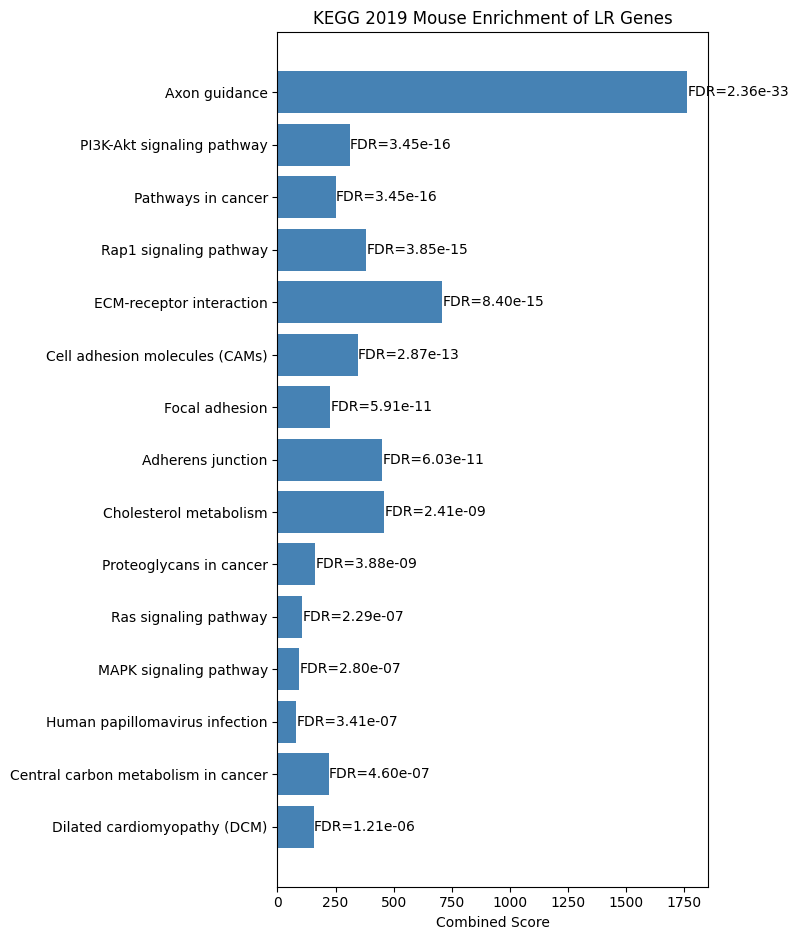

In [213]:
df = adata.uns['cpdb_res'].copy()

# regex to split complexes like "Itga6+Itgb4", "Cd3d:Cd3e", etc.
SPLIT = re.compile(r"[+\^:_ ]+")

def explode_genes(s):
    return [g for g in SPLIT.split(str(s)) if g]

genes_lig = df['ligand_complex'].dropna().map(explode_genes).explode()
genes_rec = df['receptor_complex'].dropna().map(explode_genes).explode()
mouse_genes = (pd.concat([genes_lig, genes_rec])
               .dropna().drop_duplicates().tolist())

print(f"Total unique genes extracted: {len(mouse_genes)}")

# --- run enrichment analysis (Enrichr, KEGG Mouse) ---
enr = gp.enrichr(
    gene_list=mouse_genes,
    gene_sets=["KEGG_2019_Mouse"],
    organism="Mouse",
    outdir=None
)

# --- process results ---
enrich_res = enr.results.sort_values(
    by=["Adjusted P-value", "Combined Score"],
    ascending=[True, False]
)

print("\nTop KEGG pathways:")
print(enrich_res.head(20))

# --- plot top terms ---
def plot_enrich_bar(df, top_n=15, title="KEGG Enrichment"):
    df = df.head(top_n).iloc[::-1]  # take top_n and reverse for plotting
    fig, ax = plt.subplots(figsize=(8, 0.5*len(df)+2))

    y = np.arange(len(df))
    ax.barh(y, df["Combined Score"], color="steelblue")
    ax.set_yticks(y)
    ax.set_yticklabels(df["Term"])
    ax.set_xlabel("Combined Score")
    ax.set_title(title)

    # annotate FDR
    for i, (score, q) in enumerate(zip(df["Combined Score"], df["Adjusted P-value"])):
        ax.text(score + 1, i, f"FDR={q:.2e}", va="center")

    plt.tight_layout()
    return fig, ax

# plot top KEGG terms
fig, ax = plot_enrich_bar(enrich_res, top_n=15, title="KEGG 2019 Mouse Enrichment of LR Genes")
plt.show()

C:\Users\Zhenia\AppData\Local\Temp\ipykernel_20796\153981750.py:53: DeprecationWarning: processes is deprecated; use threads
2025-09-26 15:49:09,419 [WARNING] Duplicated values found in preranked stats: 12.36% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
C:\Users\Zhenia\AppData\Local\Temp\ipykernel_20796\153981750.py:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
C:\Users\Zhenia\AppData\Local\Temp\ipykernel_20796\153981750.py:53: DeprecationWarning: processes is deprecated; use threads
2025-09-26 15:49:09,477 [WARNING] Duplicated values found in preranked stats: 11.76% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
C:\Users\Zhenia\AppData\Local\Temp\ipykernel_20796\153

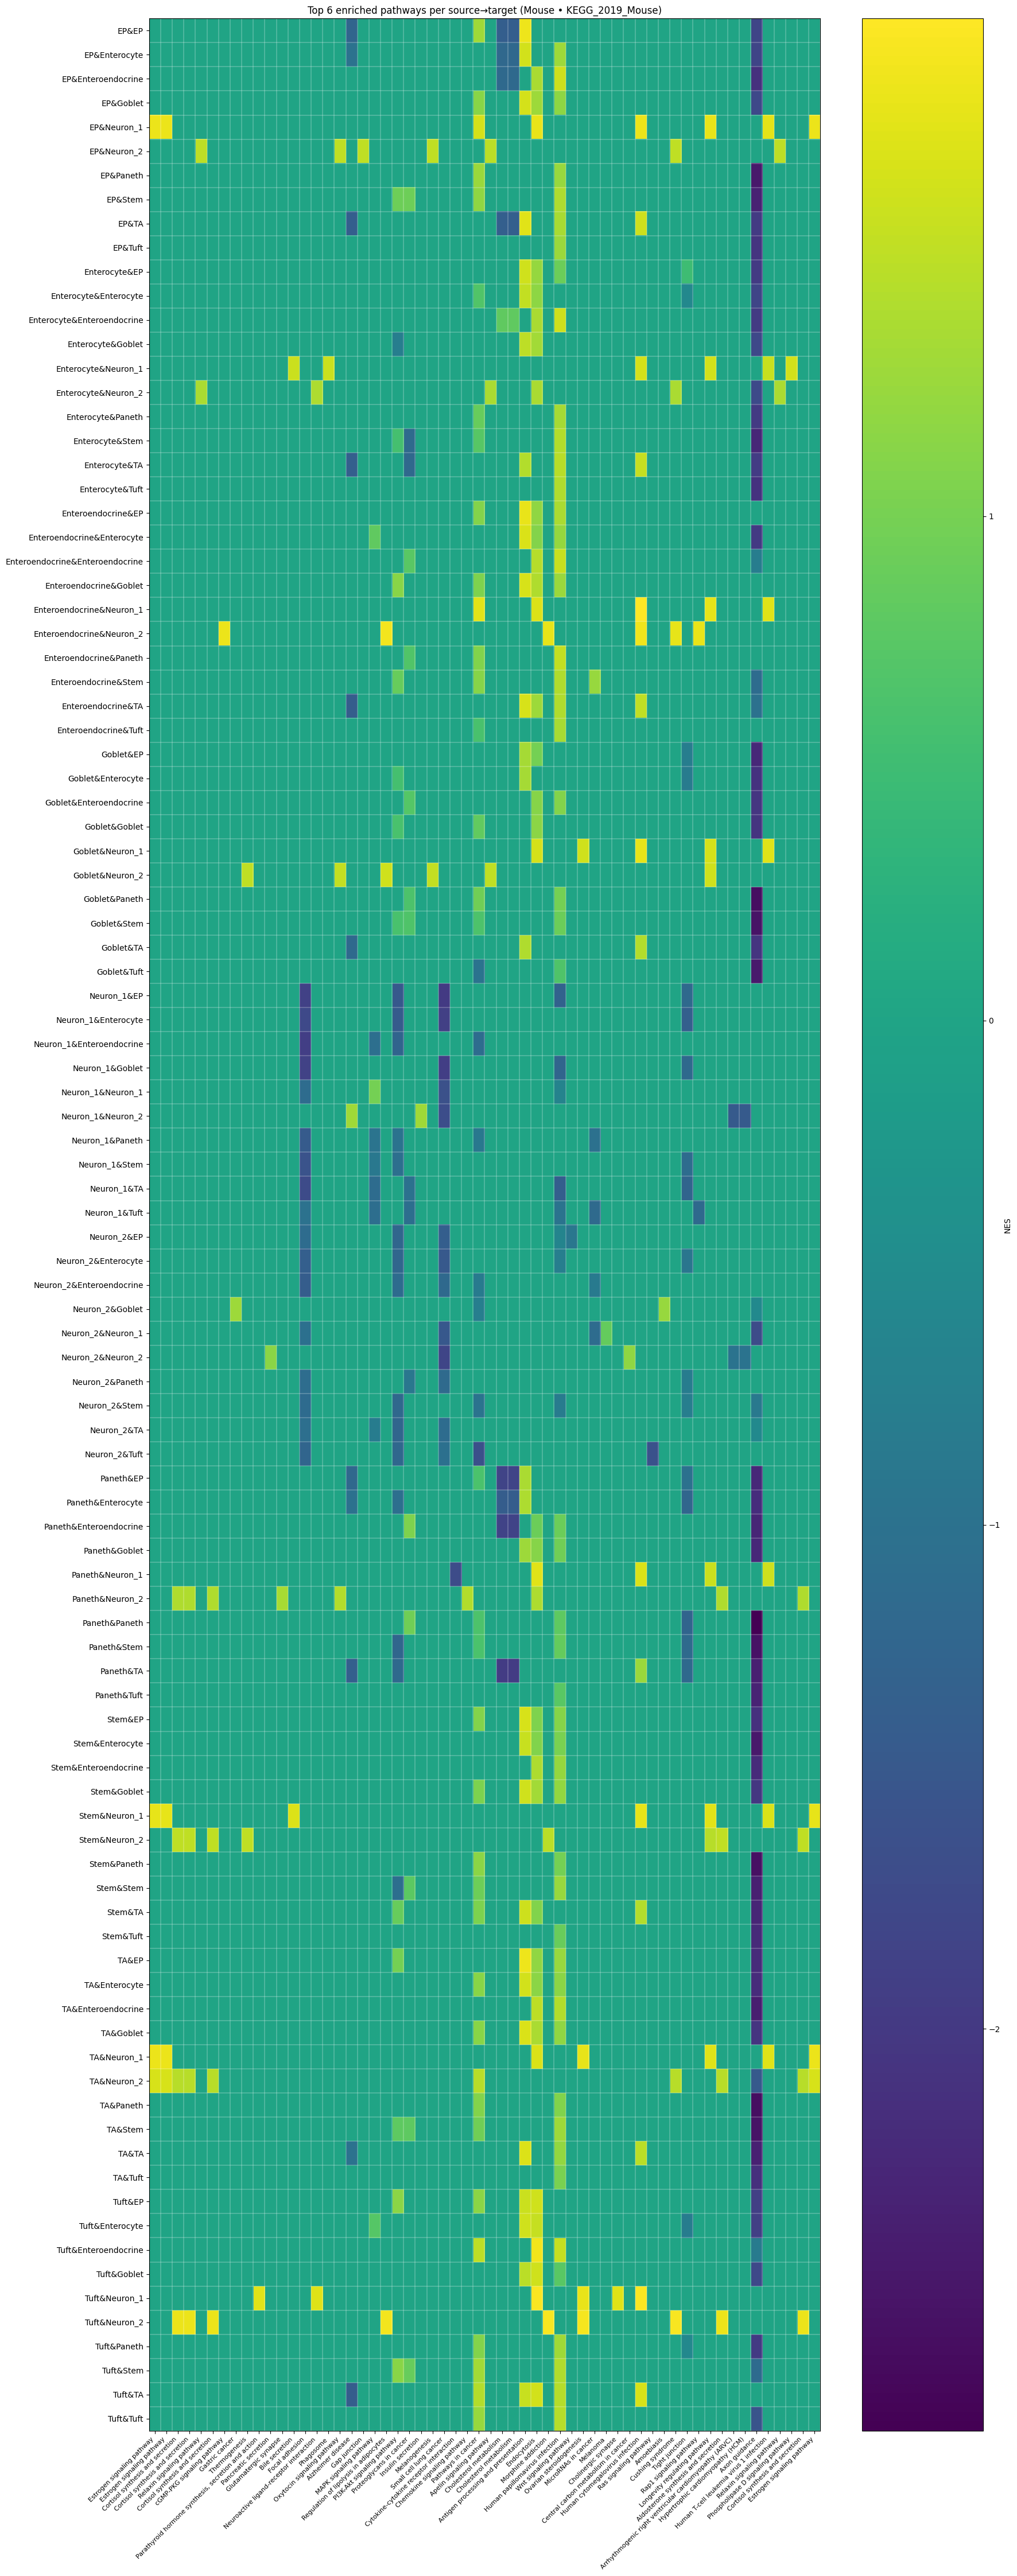

In [224]:
df = adata.uns['cpdb_res'].copy()
SPLIT = re.compile(r"[+\^:_ ]+")

def split_genes(x): return [g for g in SPLIT.split(str(x)) if g]

# choose which LR score drives the ranking
score_col = "lr_means"       # or "size_scaled"

# make a view name and expand complexes to single genes
df["view"] = df["source"].astype(str) + "&" + df["target"].astype(str)
df = df.assign(
    ligand_gene = df["ligand_complex"].map(split_genes),
    receptor_gene = df["receptor_complex"].map(split_genes),
)

# explode to gene-level rows for ranking
lig = df.explode("ligand_gene")[["view","ligand_gene", score_col]].dropna()
lig = lig.rename(columns={"ligand_gene":"gene"})

rec = df.explode("receptor_gene")[["view","receptor_gene", score_col]].dropna()
rec = rec.rename(columns={"receptor_gene":"gene"})

# normalize gene names to uppercase (important for Enrichr/KEGG match!)
lig["gene"] = lig["gene"].str.upper()
rec["gene"] = rec["gene"].str.upper()

gene_scores = pd.concat([lig, rec], ignore_index=True)

# aggregate to a single score per (view, gene)
# use mean; you can switch to max/median
gene_scores = (gene_scores
               .groupby(["view","gene"])[score_col]
               .mean()
               .reset_index())

# ----- run preranked GSEA per view (Mouse) -----
views = gene_scores["view"].unique().tolist()
top_k = 6                 # number of top terms per view for the heatmap
geneset = "KEGG_2019_Mouse"

all_cells, term_pool = [], set()

for v in views:
    rnk = (gene_scores.loc[gene_scores["view"]==v, ["gene", score_col]]
       .dropna()
       .drop_duplicates("gene")
       .set_index("gene")
       .sort_values(score_col, ascending=False)[score_col])

    if rnk.empty: 
        continue

    pre = gp.prerank(rnk=rnk, gene_sets=geneset, permutation_num=1000,
                     processes=4, outdir=None, seed=42, min_size=6)
    res2d = pre.res2d.copy()

    # normalize column names across gseapy versions
    term = "Term" if "Term" in res2d.columns else "term"
    nes  = "NES"  if "NES"  in res2d.columns else "nes"
    fdr  = "FDR q-val" if "FDR q-val" in res2d.columns else ("fdr" if "fdr" in res2d.columns else None)
    if fdr is None: continue

    res2d = res2d.replace([np.inf,-np.inf], np.nan).dropna(subset=[term, nes, fdr])
    res2d = res2d.sort_values([fdr, nes], ascending=[True, False]).head(top_k)

    for _, row in res2d.iterrows():
        all_cells.append({"view": v, "term": row[term], "NES": float(row[nes])})
        term_pool.add(row[term])

# build view × term matrix
terms = list(term_pool)
views_kept = sorted({r["view"] for r in all_cells})
mat = pd.DataFrame(index=views_kept, columns=terms, dtype=float)

for r in all_cells:
    mat.loc[r["view"], r["term"]] = r["NES"]

mat = mat.fillna(0.0)

# order columns by overall |NES| to put strongest first
col_order = np.argsort(-np.abs(mat.values)).max(axis=0)
mat = mat.iloc[:, col_order]

# ---- plot heatmap (matplotlib only) ----
fig_h = max(4, 0.45 * len(mat))
fig, ax = plt.subplots(figsize=(max(8, 0.2*mat.shape[1]+6), fig_h))
im = ax.imshow(mat.values, aspect="auto")   # default colormap, values are NES
ax.set_yticks(np.arange(mat.shape[0])); ax.set_yticklabels(mat.index)
ax.set_xticks(np.arange(mat.shape[1])); ax.set_xticklabels(mat.columns, rotation=45, ha="right", fontsize=8)
ax.set_title(f"Top {top_k} enriched pathways per source→target (Mouse • {geneset})")
cbar = plt.colorbar(im, ax=ax); cbar.set_label("NES")
ax.set_xticks(np.arange(-.5, mat.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, mat.shape[0], 1), minor=True)
ax.grid(which="minor", color="white", linestyle="-", linewidth=0.3)
ax.tick_params(which="minor", bottom=False, left=False)
fig.tight_layout()

In [226]:
df = adata.uns['cpdb_res'].copy()

# define how to split complexes
SPLIT = re.compile(r"[+\^:_ ]+")
def split_genes(x): 
    return [g for g in SPLIT.split(str(x)) if g]

# ------------------------------
# 2) Restrict to neuron ↔ other interactions
# ------------------------------
neuron_labels = ["Neuron", "Neurons", "Excitatory", "Inhibitory"]  # adjust to match your cell labels

mask = (
    (df["source"].isin(neuron_labels) & ~df["target"].isin(neuron_labels))
    | (~df["source"].isin(neuron_labels) & df["target"].isin(neuron_labels))
)
df = df[mask].copy()

# create a "view" = source&target
df["view"] = df["source"].astype(str) + "&" + df["target"].astype(str)

# ------------------------------
# 3) Expand complexes into single genes
# ------------------------------
score_col = "lr_means"       # or "size_scaled"

df = df.assign(
    ligand_gene   = df["ligand_complex"].map(split_genes),
    receptor_gene = df["receptor_complex"].map(split_genes),
)

lig = df.explode("ligand_gene")[["view","ligand_gene", score_col]].dropna()
lig = lig.rename(columns={"ligand_gene":"gene"})

rec = df.explode("receptor_gene")[["view","receptor_gene", score_col]].dropna()
rec = rec.rename(columns={"receptor_gene":"gene"})

# normalize gene names to uppercase (important for KEGG/Enrichr matching)
lig["gene"] = lig["gene"].str.upper()
rec["gene"] = rec["gene"].str.upper()

# combine ligand + receptor
gene_scores = pd.concat([lig, rec], ignore_index=True)

# aggregate to a single score per (view, gene)
gene_scores = (gene_scores
               .groupby(["view","gene"])[score_col]
               .mean()
               .reset_index())

# ------------------------------
# 4) Run GSEA per view (neurons only)
# ------------------------------
views = gene_scores["view"].unique().tolist()
top_k = 6
geneset = "KEGG_2019_Mouse"

all_cells, term_pool = [], set()

for v in views:
    rnk = (gene_scores.loc[gene_scores["view"]==v, ["gene", score_col]]
           .dropna()
           .drop_duplicates("gene")
           .set_index("gene")
           .sort_values(score_col, ascending=False)[score_col])

    if rnk.empty: 
        continue

    pre = gp.prerank(
        rnk=rnk,
        gene_sets=geneset,
        permutation_num=1000,
        processes=4,
        outdir=None,
        seed=42,
        min_size=6
    )
    res2d = pre.res2d.copy()

    # normalize column names across gseapy versions
    term = "Term" if "Term" in res2d.columns else "term"
    nes  = "NES"  if "NES"  in res2d.columns else "nes"
    fdr  = "FDR q-val" if "FDR q-val" in res2d.columns else ("fdr" if "fdr" in res2d.columns else None)
    if fdr is None: 
        continue

    res2d = res2d.replace([np.inf,-np.inf], np.nan).dropna(subset=[term, nes, fdr])
    res2d = res2d.sort_values([fdr, nes], ascending=[True, False]).head(top_k)

    for _, row in res2d.iterrows():
        all_cells.append({"view": v, "term": row[term], "NES": float(row[nes])})
        term_pool.add(row[term])

# ------------------------------
# 5) Build view × pathway matrix
# ------------------------------
terms = list(term_pool)
views_kept = sorted({r["view"] for r in all_cells})
mat = pd.DataFrame(index=views_kept, columns=terms, dtype=float)

for r in all_cells:
    mat.loc[r["view"], r["term"]] = r["NES"]

mat = mat.fillna(0.0)

# skip if empty
if mat.shape[0] == 0 or mat.shape[1] == 0:
    raise ValueError("No enriched pathways found for Neuron ↔ Other interactions.")

# order columns by overall |NES| (strongest pathways first)
col_order = np.argsort(-np.max(np.abs(mat.values), axis=0))
mat = mat.iloc[:, col_order]

# ------------------------------
# 6) Plot heatmap
# ------------------------------
fig_h = max(4, 0.45 * len(mat))
fig, ax = plt.subplots(figsize=(max(8, 0.2*mat.shape[1]+6), fig_h))

im = ax.imshow(mat.values, aspect="auto", cmap="coolwarm")   # color by NES
ax.set_yticks(np.arange(mat.shape[0])); ax.set_yticklabels(mat.index)
ax.set_xticks(np.arange(mat.shape[1])); ax.set_xticklabels(mat.columns, rotation=45, ha="right", fontsize=8)

ax.set_title(f"Top {top_k} enriched pathways • Neuron ↔ Other (Mouse • {geneset})")
cbar = plt.colorbar(im, ax=ax); cbar.set_label("NES")

# grid lines
ax.set_xticks(np.arange(-.5, mat.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, mat.shape[0], 1), minor=True)
ax.grid(which="minor", color="white", linestyle="-", linewidth=0.3)
ax.tick_params(which="minor", bottom=False, left=False)

fig.tight_layout()
plt.show()

ValueError: No enriched pathways found for Neuron ↔ Other interactions.

In [208]:
# Run preranked GSEA (mouse GO BP as example)
deg_gsea = gp.prerank(
    rnk=deg_ranking,
    gene_sets="KEGG_2019_Mouse",
    processes=4,
    permutation_num=1000,
    outdir="gsea_deg_epithelial_vs_neurons",
    seed=42
)

C:\Users\Zhenia\AppData\Local\Temp\ipykernel_20796\1933891366.py:2: DeprecationWarning: processes is deprecated; use threads
2025-09-26 15:30:00,873 [WARNING] Duplicated values found in preranked stats: 1.26% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


ValueError: 'x' has size 12029, but 'y1' has an unequal size of 12030